# Создание модель машинного обучения для предсказании неудач стартапов

## Описание проекта

Построение бизнеса – непростая задача. Все начинается с идеи, которая может помочь решить проблему, с которой сталкиваются люди. Но даже с самой лучшей и инновационной идеей вы не сможете продвинуться достаточно далеко, если у вас нет достаточной финансовой поддержки. Если стартапу не удастся получить достаточную поддержку, особенно на ранней стадии, ему придется закрыться. В 2022 году отсутствие финансирования привело к неудачам 47% стартапов.
Финансирование — это жизненно важная вещь, в которой нуждается стартап, и оно состоит из множества этапов, называемых раундами финансирования (funding rounds):
- pre-seed funding, вероятно, самый важный раунд, на котором компания пускает корни
- first seed funding, на котором компания должна создать фундамент, на котором она стремится иметь устойчивое будущее.
- series A funding. В течение этого периода привилегированные акции продаются инвесторам, которые желают принимать более активное участие в их развитии.
- series B funding. Это четвертый этап, на котором инвесторы проверяют, продолжает ли компания расти, чтобы они могли получить долгосрочную прибыль.
- series C funding, на этом этапе ожидается, что компания, добившаяся успеха на ранней стадии, будет иметь большой входящий доход.
- series D funding, здесь компания может выбрать переход в серию D или на стадию IPO (первичное публичное размещение акций). Переход к этому этапу вместо этапа IPO не является признаком неудачи.
- Стадия IPO — это когда компания перешла в публичную компанию, на которой компания выпускает новые акции для широкой публики, которая теперь может покупать акции бизнеса.

Каждая компания может перейти в следующий раунд только в том случае, если ей удастся завершить текущий раунд, то есть если они собрали достаточно капитала.

Интересная статистика от: https://explodingtopics.com/blog/startup-failure-stats <q>According to the latest data, up to 90% of startups fail. Across almost all industries, the average failure rate for year one is 10%. However, in years two through five, a staggering 70% of new businesses will fail.</q>
То ест грубо говорят большинство новых стартапов не выживают более пять лет.

Согласно с https://www.investopedia.com/articles/personal-finance/040915/how-many-startups-fail-and-why.asp , причинами сбоев стратапа являются:
- У стартапа закончились деньги.
- Целевой рынок неверен.
- проведено недостаточно исследований.
- Установлено плохое партнерство
- Маркетинг был проведен неправильно
- Предприниматель – новичок в своем деле.

## Цель исследования

Поскольку речь идет о больших деньгах, наша цель — с помощью модели машинного обучения предсказать, закроется ли стартап.

## Ход исследования

- Подгатовка данных: Загрузка и изучение общей информации из предоставлено датасета.
- Предоработка данных: Обработка пропущенных значений, корректировка типа данных, дубликатов и других аномалий.
- Исследовательский анализ данных: Изучение основных параметров объектов, их распределение, присутствие выбросов,  явление и обработка аномали
- Анализ корреляции: Исследование связи между признаками чтобы понимать если нужно или нет устранить несколко признаких
- Построение пайплайн с методом оптимизации чтобы отобрать самую лучшую модель для МО
- Анализы важности признаков чтобы понимать какие признаки важны и какие нет
- Попытка увеличть качество модели при помощи устранения не важных призаков
- Изучение пределов модели и если она соответствует ожиданиям закачика
- Используйте нашу лучшую модель с тестовым набором данных, чтобы предсказать, закроются ли стартапы из датасета



In [ ]:
# Библиотеки

!pip install -U seaborn
!pip install -U scikit-learn
!pip install phik
!pip install shap
!pip install category_encoders
!pip install catboost
!pip install lightbm
!pip3 install pycaret

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
import phik
import shap

from google.colab import drive
drive.mount("/content/drive")

from collections import Counter

# загружаем модуль SelectKBest
from sklearn.feature_selection import SelectKBest, f_classif

# загружаем модуль пермутации
from sklearn.inspection import permutation_importance

# Encoders
import category_encoders as ce
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

# загружаем класс pipeline
#from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline

from imblearn.over_sampling import SMOTENC
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedRandomForestClassifier

from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder

# загружаем функцию для работы с метриками
from sklearn.metrics import f1_score, make_scorer
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

from pycaret import classification
# from pycaret.utils import enable_colab
# enable_colab()

shap.initjs()


  Using cached scikit_learn-1.5.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
Using cached scikit_learn-1.5.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.4 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.2
    Uninstalling scikit-learn-1.4.2:
      Successfully uninstalled scikit-learn-1.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sktime 0.26.0 requires scikit-learn<1.5.0,>=0.24, but you have scikit-learn 1.5.1 which is incompatible.
ERROR: Could not find a version that satisfies the requirement lightbm (from versions: none)
ERROR: No matching distribution found for lightbm
  Using cached scikit_learn-1.4.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.4.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Загрузка данные

## Тренировочние данные

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Startups_project/kaggle_startups_train_28062024.csv')
df_train.head()

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
0,Lunchgate,Online Reservations|Restaurants,828626.0,operating,CHE,25,Zurich,Zürich,2,2009-10-17,2011-05-01,2014-12-01,NaN
1,EarLens,Manufacturing|Medical|Medical Devices,42935019.0,operating,USA,CA,SF Bay Area,Redwood City,4,2005-01-01,2010-05-04,2014-02-25,NaN
2,Reviva Pharmaceuticals,Biotechnology,35456381.0,operating,USA,CA,SF Bay Area,San Jose,3,2006-01-01,2012-08-20,2014-07-02,NaN
3,Sancilio and Company,Health Care,22250000.0,operating,NaN,NaN,NaN,NaN,3,2004-01-01,2011-09-01,2014-07-18,NaN
4,WireTough Cylinders,Manufacturing,NaN,operating,USA,VA,VA - Other,Bristol,1,2010-05-12,2012-02-01,2012-02-01,NaN


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52516 entries, 0 to 52515
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               52515 non-null  object 
 1   category_list      50051 non-null  object 
 2   funding_total_usd  42447 non-null  float64
 3   status             52516 non-null  object 
 4   country_code       47014 non-null  object 
 5   state_code         45753 non-null  object 
 6   region             46157 non-null  object 
 7   city               46157 non-null  object 
 8   funding_rounds     52516 non-null  int64  
 9   founded_at         52516 non-null  object 
 10  first_funding_at   52516 non-null  object 
 11  last_funding_at    52516 non-null  object 
 12  closed_at          4917 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 5.2+ MB


Датафрейм с тренировочнами датами содержит 52516 строки и 13 столбцов, 1 столбцец с количественными данными:

- funding_total_usd, общая сумма финансирования в USD;

и 12 столбцов с категориальными данными:
- name - Название стартапа
- category_list - Список категорий, к которым относится стартап
- status - Статус стартапа (закрыт или действующий)
- country_code - Код страны
- state_code - Код штата
- region - Регион
- city - Город
- funding_rounds - Количество раундов финансирования
- founded_at - Дата основания
- first_funding_at - Дата первого раунда финансирования
- last_funding_at - Дата последнего раунда финансирования
- closed_at - Дата закрытия стартапа (если применимо)

Отметим что ect 1 пропуск в столбце 'name' и многих пропусков в столбце 'category_list', 'funding_total_usd', 'country_code', 'state_code', 'region', 'city' и 'closed_at'.

Отметим что 'name', 'category_list', 'funding_total_usd', 'status', 'country_code', 'state_code', 'region', 'city', 'funding_rounds' в корректном тип дата.
Однако 'founded_at', 'first_funding_at', 'last_funding_at', 'closed_at' нужно их конвертировать в pandas datetime.

'status' - целевой признак. Наше машиное обученое модели являеться классификационны из-за того что целевой признак - категоряльное. Можно тоже думать что деревяний модел будет хорошо работать потому что у нас болшинство категоряльние признаки.

## Тестовочное данные

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Startups_project/kaggle_startups_test_28062024.csv')
df_test.head()

,name,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,lifetime
0,Crystalsol,Clean Technology,2819200.0,NIC,17,NaN,NaN,1,2009-07-01,2009-07-01,3501
1,JBI Fish & Wings,Hospitality,NaN,USA,TN,TN - Other,Humboldt,1,2010-07-28,2010-07-28,2717
2,COINPLUS,Finance,428257.0,LUX,3,Esch-sur-alzette,Esch-sur-alzette,2,2014-05-15,2014-09-18,1295
3,Imagine Communications,Software|Video|Video Streaming,34700000.0,USA,CA,San Diego,San Diego,4,2005-01-01,2010-04-20,4748
4,DNA13,Software,4530000.0,CAN,ON,Ottawa,Ottawa,1,2007-05-08,2007-05-08,6209


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               13125 non-null  object 
 1   category_list      12534 non-null  object 
 2   funding_total_usd  10547 non-null  float64
 3   country_code       11743 non-null  object 
 4   state_code         11430 non-null  object 
 5   region             11536 non-null  object 
 6   city               11538 non-null  object 
 7   funding_rounds     13125 non-null  int64  
 8   first_funding_at   13125 non-null  object 
 9   last_funding_at    13125 non-null  object 
 10  lifetime           13125 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1.1+ MB


По сравню с тренировочной датафреймом, в датафрейме df_test убрали столбце 'status', 'closed_at' и 'founded_at', и появились новий столбце - 'lifetime' (количествие значение). Датафрейм содержит 13125 строки и мы видим  что у нас пропуски в 6 столбцах : 'category_list', 'funding_total_round', 'country_code', 'state_code', 'region' и 'city'.

## Датафрейм с целевым признаком

In [ ]:
y_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Startups_project/kaggle_startups_sample_submit_28062024.csv')
y_test.head()

,name,status
0,Crystalsol,closed
1,JBI Fish & Wings,operating
2,COINPLUS,closed
3,Imagine Communications,closed
4,DNA13,operating


In [ ]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    13125 non-null  object
 1   status  13125 non-null  object
dtypes: object(2)
memory usage: 205.2+ KB


Это датафрейм - наш целевой признак, у него одно и то же индексы как у df_test и они в том же порядке.


# Преоработка данных

## Преобразование типа данных

In [ ]:
dataframes = [df_train, df_test]
columns = ['founded_at', 'first_funding_at', 'last_funding_at', 'closed_at']

for df in dataframes:
    for col in columns:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], format='%Y-%m-%d')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52516 entries, 0 to 52515
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               52515 non-null  object        
 1   category_list      50051 non-null  object        
 2   funding_total_usd  42447 non-null  float64       
 3   status             52516 non-null  object        
 4   country_code       47014 non-null  object        
 5   state_code         45753 non-null  object        
 6   region             46157 non-null  object        
 7   city               46157 non-null  object        
 8   funding_rounds     52516 non-null  int64         
 9   founded_at         52516 non-null  datetime64[ns]
 10  first_funding_at   52516 non-null  datetime64[ns]
 11  last_funding_at    52516 non-null  datetime64[ns]
 12  closed_at          4917 non-null   datetime64[ns]
dtypes: datetime64[ns](4), float64(1), int64(1), object(7)
memory 

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               13125 non-null  object        
 1   category_list      12534 non-null  object        
 2   funding_total_usd  10547 non-null  float64       
 3   country_code       11743 non-null  object        
 4   state_code         11430 non-null  object        
 5   region             11536 non-null  object        
 6   city               11538 non-null  object        
 7   funding_rounds     13125 non-null  int64         
 8   first_funding_at   13125 non-null  datetime64[ns]
 9   last_funding_at    13125 non-null  datetime64[ns]
 10  lifetime           13125 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(6)
memory usage: 1.1+ MB


Преобразования выполнены успешно.

## Пропуски в датасетах

In [ ]:
df_train.isna().sum()/len(df_train)

,0
name,0.000019
category_list,0.046938
funding_total_usd,0.191732
status,0.000000
country_code,0.104768
state_code,0.128780
region,0.121087
city,0.121087
funding_rounds,0.000000
founded_at,0.000000


Не хватает один имя которое наверно не будем заменить так как мы убираем этот столбец во вермя моделировании. Пропуски в:
- category_list составляет 4,69% данных,
- funding_total_usd составляет 19,17% данных,
- country_code составляет 10,48% данных,
- state_code составляет 12,88% данных,
- region составляет 12,11% данных,
- city составляет 12,11% данных,
- closed_at составляет 90,64% данных


Мы будем заниматься пропуски в столбце 'category_list', 'funding_total_usd', 'country_code', 'state_code', 'region', 'city' во время pipeline с inputer методом.
Пропуски в столбце 'closed_at' будем заниматься в часть 'feature engineering' чтобы создать столбец 'lifetime'.

Давайте посмотрим на пропуски. Мы можем найти некоторые категории с названием компании. Однако что касается отсутствующих стран, мы не можем на самом деле восполнить это, только если сможем угадать их по городам или регионам, если они существовают.

In [ ]:
df_train.query('country_code.isna()==True and state_code.isna()==False or country_code.isna()==True and city.isna()==False '\
              'or country_code.isna()==True and region.isna()==False')

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at


Мы видим, что когда название страны отсутствует, нет соответствующего города или региона.

In [ ]:
df_train['country_code'].value_counts(normalize=True)[:10]

,proportion
country_code,
USA,0.631769
GBR,0.062216
CAN,0.032756
IND,0.027141
CHN,0.026375
FRA,0.019484
DEU,0.017739
ISR,0.016314
ESP,0.012911


Вероятно, мы будем использовать стратегию «most frequent» с SimpleImputer для признака «country_code».

In [ ]:
df_train['state_code'].value_counts(normalize=True)[:5]

,proportion
state_code,
CA,0.223351
NY,0.068017
MA,0.044150
TX,0.034140
H9,0.033003


In [ ]:
df_train['region'].value_counts(normalize=True)[:5]

,proportion
region,
SF Bay Area,0.151006
New York City,0.060143
Boston,0.040947
London,0.039864
Los Angeles,0.032779


In [ ]:
df_train['city'].value_counts(normalize=True)[:5]

,proportion
city,
San Francisco,0.061182
New York,0.053860
London,0.032801
Austin,0.013194
Palo Alto,0.013151


In [ ]:
df_test.isna().sum()

,0
name,0
category_list,591
funding_total_usd,2578
country_code,1382
state_code,1695
region,1589
city,1587
funding_rounds,0
first_funding_at,0
last_funding_at,0


Если страна отсутствует, невозможно угадать, что это такое по другим признаками «state_code», «region» или «city», поскольку они также отсутствуют, когда отсутствует код страны. Если мы посмотрим на 10 наиболее представленных стран, мы увидим, что США представляют 63,2% данных, вторая Великобритания представляет только 6,2%, третья, Канада, представляет 3,2% и десятая, Нидерланды, представляет менее 1%. . Вероятно, стоит использовать опцию 'most_frequent' с SimpleImputer для «country_code». Однако было бы сложнее использовать эту функцию для «state_code», «region» и «city», поскольку наиболее представленные городы, регионы и штаты представляют соответственно только 6% (San Francisco), 15% (San Francisco Bay Area) и 22% (California). Использование стратегии 'most frequent' для этих признаков можеть приведет к искажению набора данных.

In [ ]:
df_train['category_list'].value_counts(normalize=True)[:15]

,proportion
category_list,
Software,0.064075
Biotechnology,0.058041
E-Commerce,0.021258
Mobile,0.018381
Clean Technology,0.017822
Curated Web,0.017043
Health Care,0.014865
Hardware + Software,0.014645
Games,0.013606


Что касается признак категории, нам, вероятно, нужно поработать над этой функцией, прежде чем мы сможем узнать, какую стратегию использовать с SimpleImputer. Например, мы видим категории, которые, возможно, придется сгруппировать, например:
'Hardware + Software' и 'Enterprise Software'

Что касается пропущенных числовых значений в 'fund_total_usd', мы собираемся использовать KNNImputer для замены пропущенных значений.

## Дупликаты

### Явние дупликаты

In [ ]:
def find_obvious_duplicates(dataframe):
    return dataframe.duplicated().sum()

dataframes = [df_train]
dataframes_names = ['df_train']

for index, dataframe in enumerate(dataframes):
    res = find_obvious_duplicates(dataframe)
    print(f'{res} явны дупликаты в датафрейме {dataframes_names[index]}')

0 явны дупликаты в датафрейме df_train


Нет явных дупликатов.

### Проверка уникальнте значение в столбце 'name'

In [ ]:
def check_duplicates_id(dataframe):
    return dataframe.duplicated(subset='name').sum()

dataframes = [df_train]
dataframes_names = ['df_train', 'df_test']

for index, dataframe in enumerate(dataframes):
    res = check_duplicates_id(dataframe)
    print(f'{res} дупликаты в столбце \'name\' в датафрейме {dataframes_names[index]}')

0 дупликаты в столбце 'name' в датафрейме df_train


Все стартапы точно уникальние.

In [ ]:
set(df_train['name'].to_list()).intersection(df_test['name'].to_list())

set()

Эти два набора данных не связаны ни с одной компанией.

### Проверка присутствия не явных дупликатов в других столбцах

In [ ]:
# Список категориальных столбцов
col_cat = ['category_list', 'status', 'country_code', 'state_code', 'region', 'city']

#  Создаем пустой лист для соханиение резултат
list_unique = []

list_unique_cat = {}

for col in col_cat:
    if col in df_train.columns:
        list_unique_cat[col] = df_train[col].unique().tolist()
list_unique.append(list_unique_cat)
list_unique

[{'category_list': ['Online Reservations|Restaurants',
   'Manufacturing|Medical|Medical Devices',
   'Biotechnology',
   'Health Care',
   'Manufacturing',
   'Mobile',
   'Analytics|Business Analytics|Social CRM|Social Media Monitoring|Software',
   'Software',
   'Semiconductors',
   'Clean Technology',
   nan,
   'Nanotechnology|Technology|Wine And Spirits',
   'Customer Service|Delivery|Retail',
   'Analytics|Cloud Data Services|Computers|Networking|Software',
   'Banking|Finance|Loyalty Programs',
   'Messaging',
   'Consumers',
   'Generation Y-Z|Photo Sharing|Social Media',
   'College Recruiting|Enterprise Software|Recruiting|SaaS|Social Recruiting|Software',
   'Technology',
   'Finance|Financial Services|Payments',
   'Cloud Computing|Enterprise Resource Planning|Manufacturing|Software',
   'DIY|Environmental Innovation',
   'Entertainment|Games',
   'Internet|Pets|Services',
   'Advertising|Sales and Marketing',
   'Fitness|Sports',
   'Consumer Goods|Food Processing|Organi

Похоже, что большая часть значений уникальна, нет дубликатов, за исключением категорий, где есть некоторые слова, написанные иногда с «s», а иногда без ('Application' и 'Applications').
Мы уже понимаем, что столбцы содержают много разных значений, что заставит нас выбрать правильный кодировщик, чтобы избежать проклятия размерности (dimensionnality curse), и правильную стратегию, чтобы наша модель не переобучалось.

## Feature engineering

Поскольку мы собираемся добавить столбцы в наши фреймы данных df_train и df_test, давайте сделаем их копию, чтобы сохранить исходную нетронутой.

In [ ]:
# Копируем датафрейм df_train
X_train = df_train.copy()

In [ ]:
# Копируем датафрейм df_test
X_test = df_test.copy()

## Создание столбец first_funding_year

Поскольку мы не можем закодировать объект datetime, нам нужно извлечь важную информацию из нашей даты. Год может быть важным. Например, в 2008 году случился экономический кризис, и это могло повлиять на данные.

In [ ]:
X_train['first_funding_year'] = X_train['first_funding_at'].dt.year

In [ ]:
X_test['first_funding_year'] = X_test['first_funding_at'].dt.year

## Создание столбец last_funding_year

In [ ]:
X_train['last_funding_year'] = X_train['last_funding_at'].dt.year

In [ ]:
X_test['last_funding_year'] = X_test['last_funding_at'].dt.year

## Создание столбец first_funding_month

Месяц также может иметь значение. Мы знаем, что люди делают ремонт в доме обычно летом, во время Рождества, людям приходится тратить больше и т. д. Вероятно, это не имеет значения в масштабах компании, но мы все равно можем попробовать, в конце мы всегда сможем удалить это, оснобено, если это усложняло нашу модель.

In [ ]:
X_train['first_funding_month'] = X_train['first_funding_at'].dt.month

In [ ]:
X_test['first_funding_month'] = X_test['first_funding_at'].dt.month

## Создание столбец last_funding_month

In [ ]:
X_train['last_funding_month'] = X_train['last_funding_at'].dt.month

In [ ]:
X_test['last_funding_month'] = X_test['last_funding_at'].dt.month

## Создание столбец 'lifetime'

Так как у нас нет столбец 'closed_at' и 'found_at' в X_test и нет столбца 'lifetime' в X_train. Я решил создать столбце 'lifetime' в X_train. Во время моделирование мы будем убирать столбец 'closed_at' из датасета. Дата загрузки - известный, это 2018-01-01, значить что мы можем рачитывать значение столбца 'lifetime'.



In [ ]:
len(X_train.query('status == "operating"'))/len(X_train) == X_train['closed_at'].isna().sum()/len(X_train)

True

Пропуски в столбце 'closed_at' - компани которие ещё работают.

Во первых, нам нужно создать новый столбец от столбца 'closed_at' где пропуски будут замененые с значение дата загрузки - '2018-01-01'.

In [ ]:
# Преобразоваем строк '2018-01-01' на datetime
loading_date = pd.to_datetime('2018-01-01')

# Заменяем пропуски из 'closed_at' с датой загрузки
X_train['closed_at'] = X_train['closed_at'].fillna(loading_date)

In [ ]:
# Расчитываем значение столбца 'lifetime'
X_train['lifetime'] = X_train['closed_at']-X_train['founded_at']

In [ ]:
# Пробразоваем значение от день до integer
X_train['lifetime'] = X_train['lifetime'].dt.days

In [ ]:
X_train.head()

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at,first_funding_year,last_funding_year,first_funding_month,last_funding_month,lifetime
0,Lunchgate,Online Reservations|Restaurants,828626.0,operating,CHE,25,Zurich,Zürich,2,2009-10-17,2011-05-01,2014-12-01,2018-01-01,2011,2014,5,12,2998
1,EarLens,Manufacturing|Medical|Medical Devices,42935019.0,operating,USA,CA,SF Bay Area,Redwood City,4,2005-01-01,2010-05-04,2014-02-25,2018-01-01,2010,2014,5,2,4748
2,Reviva Pharmaceuticals,Biotechnology,35456381.0,operating,USA,CA,SF Bay Area,San Jose,3,2006-01-01,2012-08-20,2014-07-02,2018-01-01,2012,2014,8,7,4383
3,Sancilio and Company,Health Care,22250000.0,operating,NaN,NaN,NaN,NaN,3,2004-01-01,2011-09-01,2014-07-18,2018-01-01,2011,2014,9,7,5114
4,WireTough Cylinders,Manufacturing,NaN,operating,USA,VA,VA - Other,Bristol,1,2010-05-12,2012-02-01,2012-02-01,2018-01-01,2012,2012,2,2,2791


## Создание столбец pre_seed_last_round

Поскольку год и месяц будут категориялным признаком, у нас нет представления о том, как долго финансирование было. Конечно, разница между первым и последним финансированием не говорит нам, как долго длился последний раунд и длится ли он еще. Помимо этого процента, мы получаем представление о том, как долго длилось время перед первым раудом, что очень важно для стартапа. Кто-то может утверждать, что чем дольше компания будет более успешной, но это гипотеза.

Проверим, что 'lifetime' никогда не бывает равно нулю.

In [ ]:
len(X_train[X_train['lifetime']==0])

0

Lifetime никогда не бывает равно 0.

In [ ]:
X_train['pre_seed_last_round'] = 1 - (X_train['last_funding_at']-X_train['first_funding_at']).dt.days/X_train['lifetime']

In [ ]:
X_test['pre_seed_last_round'] = 1 - (X_test['last_funding_at']-X_test['first_funding_at']).dt.days/X_train['lifetime']

## Создание столбец countries

Одной из проблем с таким большим количеством отдельных значений будет переобучение: попытка модели соответствовать шуму, категориям с низкой частотой данных. Кроме того, есть еще одна проблема: новые значения из теста не попали в обучающую выборку. Вот почему я собираюсь сгруппировать низкочастотные значения вместе для набора обучающих и тестовых данных, для столбцов 'country_zone' и для других категориальных признаков ('state_code', 'region', 'city') в следующих частях.

Сгруппируем страны с частотой менее 20 вместе в группу 'Misc' ('Miscellaneous').

In [ ]:
n_threshold = 20

In [ ]:
# Подсчет количества одиночных значений в столбце категорий
countries_counts = X_train['country_code'].value_counts()
# Получите индексы объекта из категорий объектов, который отображается меньше порогового числа
countries_count_index = X_train[X_train['country_code'].map(countries_counts)<=n_threshold].index.to_list()
# Нам нужно скопировать 'country_code' в столбец 'countries'
X_train['countries'] = X_train['country_code']
# Замена значения значений, которое меньше порогового числа, на значение 'Misc.'
X_train.loc[countries_count_index, 'countries'] = 'Misc.'

In [ ]:
# Подсчет количества одиночных значений в столбце категорий
countries_counts_test = X_test['country_code'].value_counts()
# Получите индексы объекта из категорий объектов, который отображается меньше порогового числа
countries_count_index_test = X_test[X_test['country_code'].map(countries_counts_test)<=n_threshold].index.to_list()
# Нам нужно скопировать 'country_code' в столбец 'countries'
X_test['countries'] = X_test['country_code']
# Замена значения значений, которое меньше порогового числа, на значение 'Misc.'
X_test.loc[countries_count_index_test, 'countries'] = 'Misc.'

Мы собираемся сделать то же самое для 'state_code', 'region', 'city'.

## Создание столбец states

In [ ]:
states_counts = X_train['state_code'].value_counts()

states_count_index = X_train[X_train['state_code'].map(states_counts)<=n_threshold].index.to_list()

X_train['states'] = X_train['state_code']

X_train.loc[states_count_index, 'states'] = 'misc.'

In [ ]:
states_counts_test = X_test['state_code'].value_counts()

states_count_index_test = X_test[X_test['state_code'].map(states_counts_test)<=n_threshold].index.to_list()

X_test['states'] = X_test['state_code']

X_test.loc[states_count_index_test, 'states'] = 'misc.'

## Создание столбец regions

In [ ]:
regions_counts = X_train['region'].value_counts()

regions_count_index = X_train[X_train['region'].map(regions_counts)<=n_threshold].index.to_list()

X_train['regions'] = X_train['region']

X_train.loc[regions_count_index, 'regions'] = 'misc.'

In [ ]:
regions_counts_test = X_test['region'].value_counts()

regions_count_index_test = X_test[X_test['region'].map(regions_counts_test)<=n_threshold].index.to_list()

X_test['regions'] = X_test['region']

X_test.loc[regions_count_index_test, 'regions'] = 'misc.'

## Создание столбец cities

In [ ]:
cities_counts = X_train['city'].value_counts()#(dropna=False)

cities_count_index = X_train[X_train['city'].map(cities_counts)<=n_threshold].index.to_list()

X_train['cities'] = X_train['city']

X_train.loc[cities_count_index, 'cities'] = 'misc.'

In [ ]:
cities_counts_test = X_test['city'].value_counts()

cities_count_index_test = X_test[X_test['city'].map(cities_counts_test)<=n_threshold].index.to_list()

X_test['cities'] = X_test['city']

X_test.loc[cities_count_index_test, 'cities'] = 'misc.'

## Создание столбец sub_categories

Одна из основных проблем с нашим датафреймом заключается в том, что у нас слишком много уникальных значений, и это может стать проблемой во время кодирования обучение модели. Попробуем уменьшить количество уникальных значений для столбца 'category_list'.

In [ ]:
X_train['category_list'].value_counts()

,count
category_list,
Software,3207
Biotechnology,2905
E-Commerce,1064
Mobile,920
Clean Technology,892
...,...
iPad|Reviews and Recommendations|Social Television|Software|Television|Video on Demand,1
Graphics|Software|Startups,1
Curated Web|File Sharing|Graphics|PaaS,1


In [ ]:
len(X_train['category_list'].value_counts())

22105

22105 разние категории, это очень много. Давайте групируем несколкие стартары по главнам категорями с помощю словаром.

In [ ]:
def extract_main_cat(val):
    if type(val)==str and '|' in val:
        return val.split('|')[0]
    else:
        return val

X_train['main_category'] = X_train['category_list'].apply(extract_main_cat)
X_test['main_category'] = X_test['category_list'].apply(extract_main_cat)

In [ ]:
X_train['main_category'].value_counts()

,count
main_category,
Biotechnology,3592
Software,3322
E-Commerce,2173
Advertising,1926
Curated Web,1747
...,...
Racing,1
Space Travel,1
Swimming,1


Если мы возьмем основные категории, у нас уже будет 707 категорий, более 31 раз меншее чем было.

У нас такие уникальные значение созавшые из много категории, как например 'Cloud Computing|Cloud Data Services|Databases|IaaS|Services|Software|Virtualization'.

Даывайте добавляем ещё 4 признак от категории, чем больше столбцов мы добавим, тем больше мы рискуем создать большое количество 'Unknown' значений.

In [ ]:
def extract_main_cat1(val):
    if type(val)==str and '|' in val and len(val.split('|')) >= 2:
        return val.split('|')[1]
    else:
        return 'Unknown'

X_train['main_category_1'] = X_train['category_list'].apply(extract_main_cat1)
X_test['main_category_1'] = X_test['category_list'].apply(extract_main_cat1)

In [ ]:
def extract_main_cat2(val):
    if type(val)==str and '|' in val and len(val.split('|')) >= 3:
        return val.split('|')[2]
    else:
        return 'Unknown'

X_train['main_category_2'] = X_train['category_list'].apply(extract_main_cat2)
X_test['main_category_2'] = X_test['category_list'].apply(extract_main_cat2)

In [ ]:
def extract_main_cat3(val):
    if type(val)==str and '|' in val and len(val.split('|')) >= 4:
        return val.split('|')[3]
    else:
        return 'Unknown'

X_train['main_category_3'] = X_train['category_list'].apply(extract_main_cat3)
X_test['main_category_3'] = X_test['category_list'].apply(extract_main_cat3)

In [ ]:
def extract_main_cat4(val):
    if type(val)==str and '|' in val and len(val.split('|')) >= 5:
        return val.split('|')[4]
    else:
        return 'Unknown'

X_train['main_category_4'] = X_train['category_list'].apply(extract_main_cat4)
X_test['main_category_4'] = X_test['category_list'].apply(extract_main_cat4)

## Вывод

Мы получили менее 5 % пропущенных значений в «category_list» и около 10 % в «country_code», «state_code», «region», «city». Эти пропущенные значения будут обработаны во время работы паплайны с помощью метода SimpleImputer.

Мы использовали тот же принцип для признако географического местоположения (country_zone, city и т. д.), те значеня которы редко появились, групировали в группу "Misc.". Мы будем исползовать эту групу во время исползованнии  SimpleImputer, с опцим "constant", потому что я не уверен, что стратегия "most frequent" всегда является хорошей, поскольку она может исказить данные. Например за исключением "США", у нас не так много доминирующих категорий в 'state_code', 'region', 'city'.

Для категории мы создаем 5 признаков с  подкатегория.

Тоже создали дополнителный признак 'pre_seed_last_round'. С начало я хотел создать пизнак которы покажет время перед первым фундом потому что подкотовка стартапы является очень важно что бы предотвратить его неудачу. К сожалению нет признака 'found_at' в тестовом датасете, вот почему создали признак 'pre_seed_last_round', доля которая отрожаеть сколко временни занимались все раундов кроме последние, a другая доля время перед первом раундом + время последнего раунда.


# Исследовательский анализ данных

## Статистика датафреймы

In [ ]:
stat_train = X_train.drop(['first_funding_year','last_funding_year', 'first_funding_month',\
                           'last_funding_month'], axis=1).select_dtypes(include='number').describe()
stat_train

,funding_total_usd,funding_rounds,lifetime,pre_seed_last_round
count,4.244700e+04,52516.000000,52516.000000,52516.000000
mean,1.824748e+07,1.740670,3140.828129,0.897186
std,1.871173e+08,1.374522,2147.821070,0.181696
min,1.000000e+00,1.000000,19.000000,-2.557377
25%,3.360275e+05,1.000000,1739.000000,0.839832
50%,2.000000e+06,1.000000,2557.000000,1.000000
75%,1.000000e+07,2.000000,4018.000000,1.000000
max,3.007950e+10,19.000000,17378.000000,1.000000


In [ ]:
stat_test = X_test.drop(['first_funding_year','last_funding_year', 'first_funding_month', \
                         'last_funding_month'], axis=1).select_dtypes(include='number').describe()
stat_test

,funding_total_usd,funding_rounds,lifetime,pre_seed_last_round
count,1.054700e+04,13125.000000,13125.000000,13125.000000
mean,1.654910e+07,1.714438,3097.609524,0.843559
std,9.217283e+07,1.318800,2128.356554,0.401959
min,1.000000e+00,1.000000,52.000000,-9.170909
25%,3.200000e+05,1.000000,1726.000000,0.867133
50%,2.000000e+06,1.000000,2526.000000,1.000000
75%,1.000000e+07,2.000000,3866.000000,1.000000
max,4.715000e+09,15.000000,17167.000000,1.000000


Что касается общего объема финансирования, средние значения между трениворочном и тестовом датасетом аналогичны, однако стандартное отклонение почти в два раза болшее у тренировочной датасета.

Среднее 'lifetime' между датасетами близко, и оно более значительно в треновочном датасете.

Что касается раунда финансирования, то в среднем он составляет от 1 до 2 раундов, и это понятно, поскольку первый и второй раунды являются наиболее важными критическими и сложним проходить для стартапов. Большая часть сбоев стартапов происходит примерно в этом временни. Это и понятно, потому что на этом этапе стартап начнет понимать, сработает ли его бизнес-план, идеи, ответит ли рынок положительно или нет. Наборы тестовых и обучающих данных в этих столбцах близки.

В среднем срок жизни стартапа составляет около 3097 дней, но мы видим, что у нас есть исключения, возможно, успешные компании, которые живут более 17000 дней.

### Выбросы в датасетах

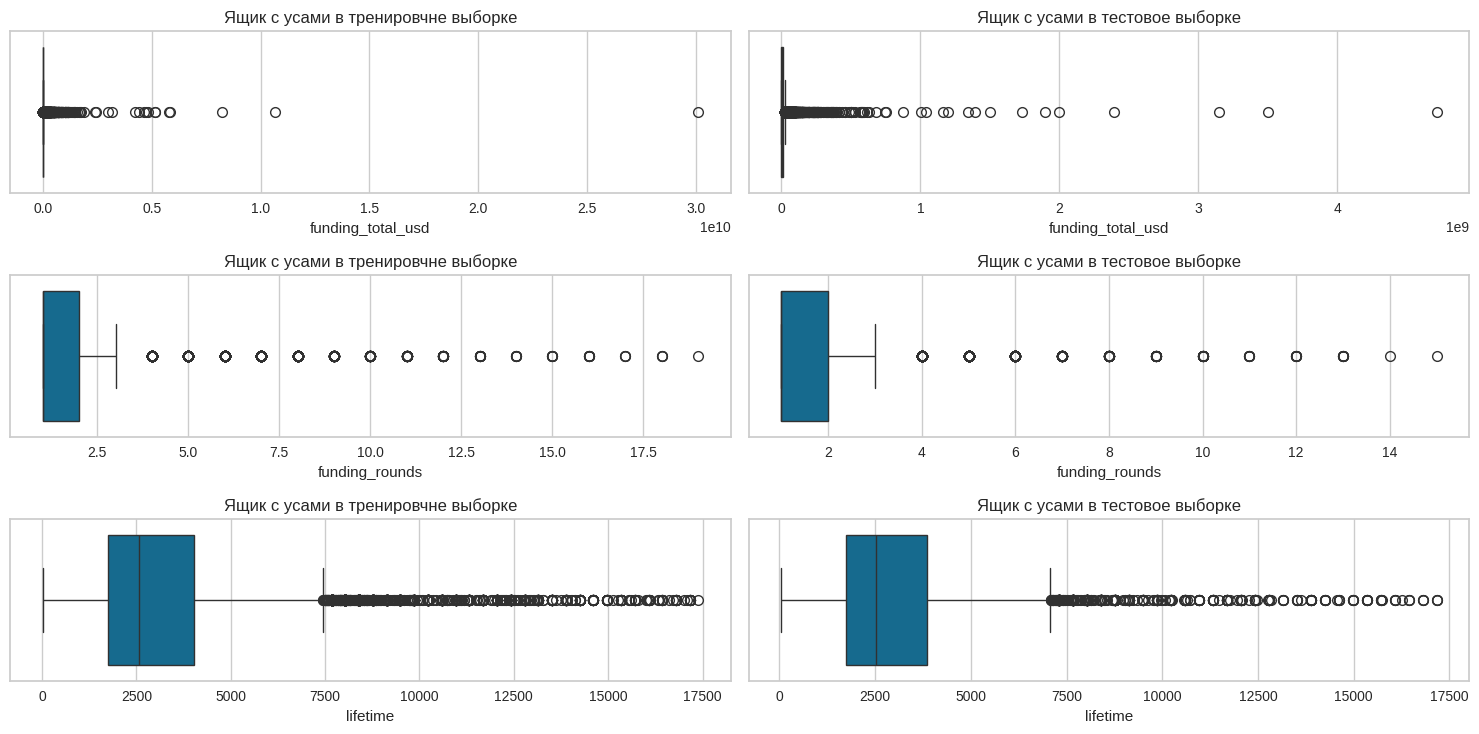

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 7.5))

col_num = ['funding_total_usd', 'funding_rounds', 'lifetime']

axes = axes.flatten()

dataframes = [X_train, X_test]

columns_names = ['funding_total_usd', 'lifetime', ]

sample_type = ['в тренировчне выборке', 'в тестовое выборке']

for i, column in enumerate(X_train[col_num].columns):
    for j, dataframe in enumerate(dataframes):

        sns.boxplot(data=dataframe, x=column, ax=axes[2*i+j])

        axes[2*i+j].set_title(f'Ящик с усами {sample_type[j%2]}')

#plt.title(f'Боксплоты');
plt.tight_layout()


plt.show()


## Проверка дисбаланс для выбросов


Можно подумать, что в выбросах могло бы быть гораздо меньше объектов класса 0 («закрытых»). Конечно, если компания просуществует долго или заработает много денег, это означает, что бизнес прибыльен и вряд ли закроется. В этом случае выбросы могут быть очень полезны для разделения обоих классов. Что касается дисбаланса, можем ли мы вообще подумать об использовании anomaly fraud detection алгоритм для нашей модели, если выбросы помогают дифференцировать оба класса.

In [ ]:
y_test.columns

Index(['name', 'status'], dtype='object')

In [ ]:
columns = ['funding_total_usd', 'lifetime', 'funding_rounds']
s = [('заработовали большее', 'долларов'), ('работали большее', 'дней'), ('проходили больщее','раунды')]

# Индекс для закрыты стартапы в тестовом датасете
index_closed_test = y_test.query('status=="closed"').index.to_list()

for i,col in enumerate(columns):
  for j in range(2):
    if j==0:
      IQR_plus = stat_train.loc['25%',col]+(stat_train.loc['75%',col]\
                                                   -stat_train.loc['25%',col])*1.5
      res = len(X_train.query('{0} > @IQR_plus and status == "closed"'.format(col)))\
      /len(X_train.query('{0} > @IQR_plus'.format(col)))
      print(f'Доля стартапов которы {s[i][0]} {round(IQR_plus,0)} {s[i][1]} и '\
            f'закрыты для тренировочны датасета :{round(res*100,2)}%.')
    else:
      IQR_plus = stat_test.loc['25%',col]+(stat_test.loc['75%',col]\
                                                   -stat_test.loc['25%',col])*1.5
      res = len(X_test.loc[index_closed_test,:].query('{0} > @IQR_plus'.format(col)))\
      /len(X_test.query('{0} > @IQR_plus'.format(col)))
      print(f'Доля стартапов которы {s[i][0]} {round(IQR_plus,0)} {s[i][1]} и '\
            f'закрыты для тестовой датасета :{round(res*100,2)}%.')




Доля стартапов которы заработовали большее 14831986.0 долларов и закрыты для тренировочны датасета :7.21%.
Доля стартапов которы заработовали большее 14840000.0 долларов и закрыты для тестовой датасета :49.25%.
Доля стартапов которы работали большее 5158.0 дней и закрыты для тренировочны датасета :1.67%.
Доля стартапов которы работали большее 4936.0 дней и закрыты для тестовой датасета :49.9%.
Доля стартапов которы проходили больщее 2.0 раунды и закрыты для тренировочны датасета :4.54%.
Доля стартапов которы проходили больщее 2.0 раунды и закрыты для тестовой датасета :50.0%.


Например, можно подумать, что если стартап уже долго существовали, прошла много раундов или заработала много денег, у неё меньше шанс закрывается. Меньшее доли для выбросов выгладить  правильно для тренировочной выборки, однако для тестового набора данных сохраняется баланс 50%-50%, что выглядит подозрительно. Это как будто тестовое датасет содержаеть особые случаи и не отражает реальность.


# Расспределение целевого признака

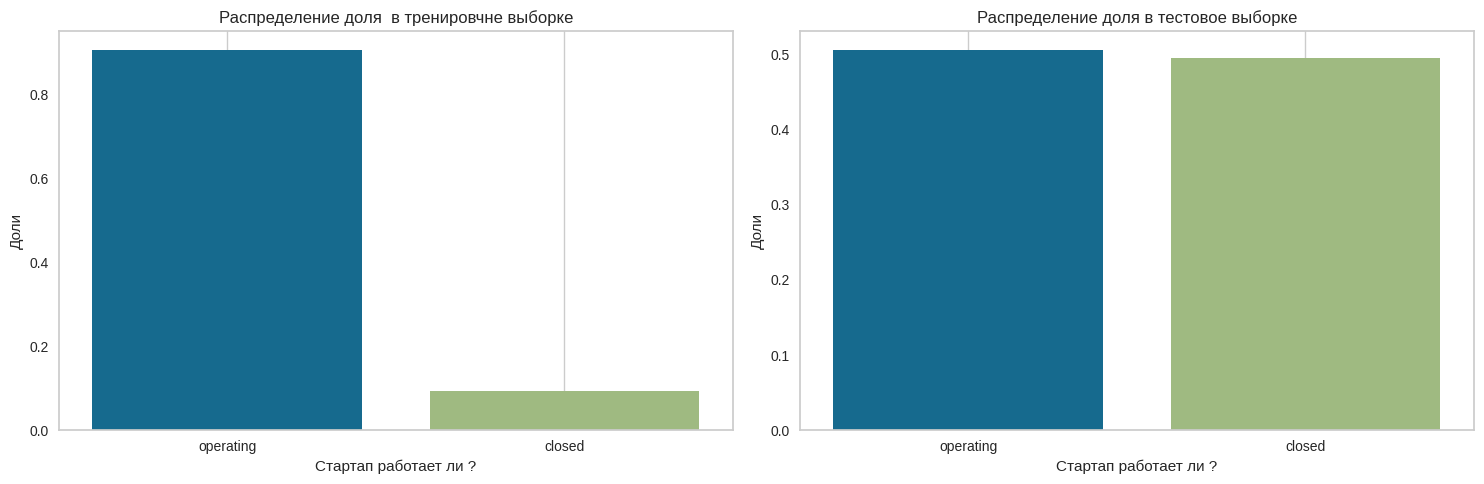

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes = axes.flatten()

dataframes = [X_train['status'].value_counts(normalize=True), y_test['status'].value_counts(normalize=True)]

sample_type = [' в тренировчне выборке', 'в тестовое выборке']

for i, dataframe in enumerate(dataframes):

    sns.barplot(x=dataframe.index, y=dataframe, hue=dataframe.index, ax=axes[i])

    axes[i].set_title(f'Распределение доля {sample_type[i]}')
    #axes[i].set_xticklabels(['Работает', 'Закрыт']);
    axes[i].set_xlabel('Стартап работает ли ?');
    axes[i].set_ylabel('Доли');
    axes[i].grid();


plt.tight_layout()


plt.show()

Мы замечаем огромный дисбаланс в вашем наборе обучающих данных (около 90%–10%), как мы и предвидели в части исследования недостающих данных. Напротив, он хорошо сбалансирован в наборе тестовых данных.

## Исследованние распеделения количеств значений

## Распеделенние общего сбора средств

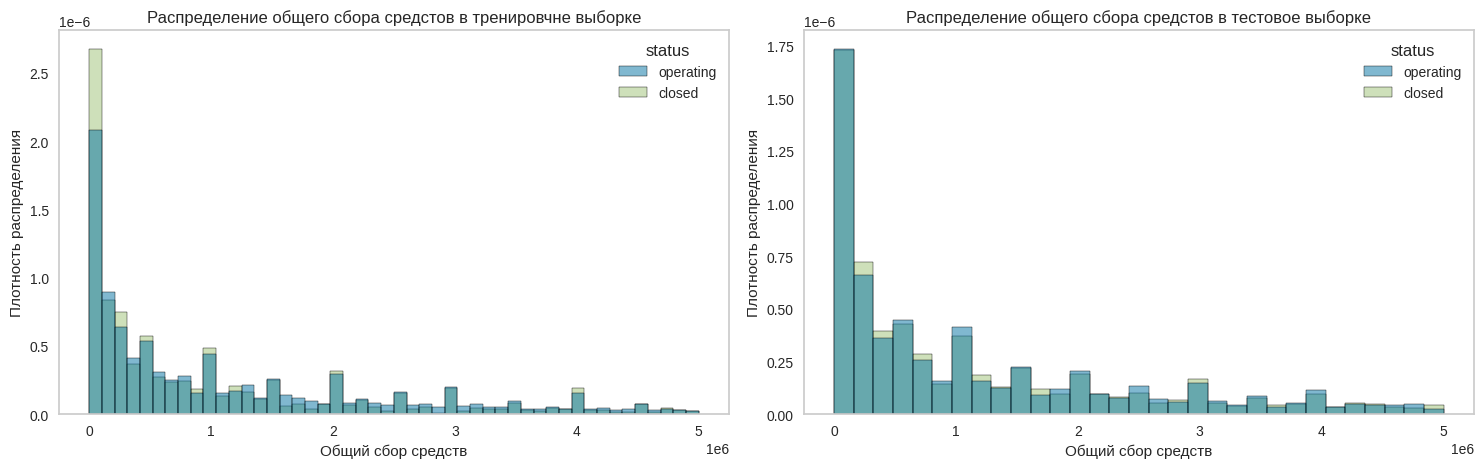

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes = axes.flatten()

dataframes = [X_train, X_test]

sample_type = ['в тренировчне выборке', 'в тестовое выборке']

for i, dataframe in enumerate(dataframes):

    if i == 0:
        sns.histplot(x=dataframe.query('funding_total_usd < 5.000000e+06')['funding_total_usd'], color = 'skyblue',hue=dataframe['status'], \
                     hue_order=['operating', 'closed'], stat='density', common_norm=False, ax=axes[i])
    else:
        sns.histplot(x=dataframe.query('funding_total_usd < 5.000000e+06')['funding_total_usd'], color = 'skyblue',hue=y_test['status'], \
                     hue_order=['operating', 'closed'], stat='density', common_norm=False, ax=axes[i])

    axes[i].set_title(f'Распределение общего сбора средстов {sample_type[i]}')

    axes[i].set_xlabel('Общий сбор средств');
    axes[i].set_ylabel('Плотность распределения');
    axes[i].grid();


plt.tight_layout()


plt.show()

Нам пришлось исползовать заглушку, чтобы остронит выбросов. Мы видим, что график для теста и тренировочной датасета выглядит одинаково. Распределение как распределение Пуассона. Можно сказать что этот признак почти не влияет в цедевое признак для тестовой датасета. Ну видно в первом графике что болшее стартапа закрылись когда мало денег зарабатывали.

## Распеделенние продолжительность жизни

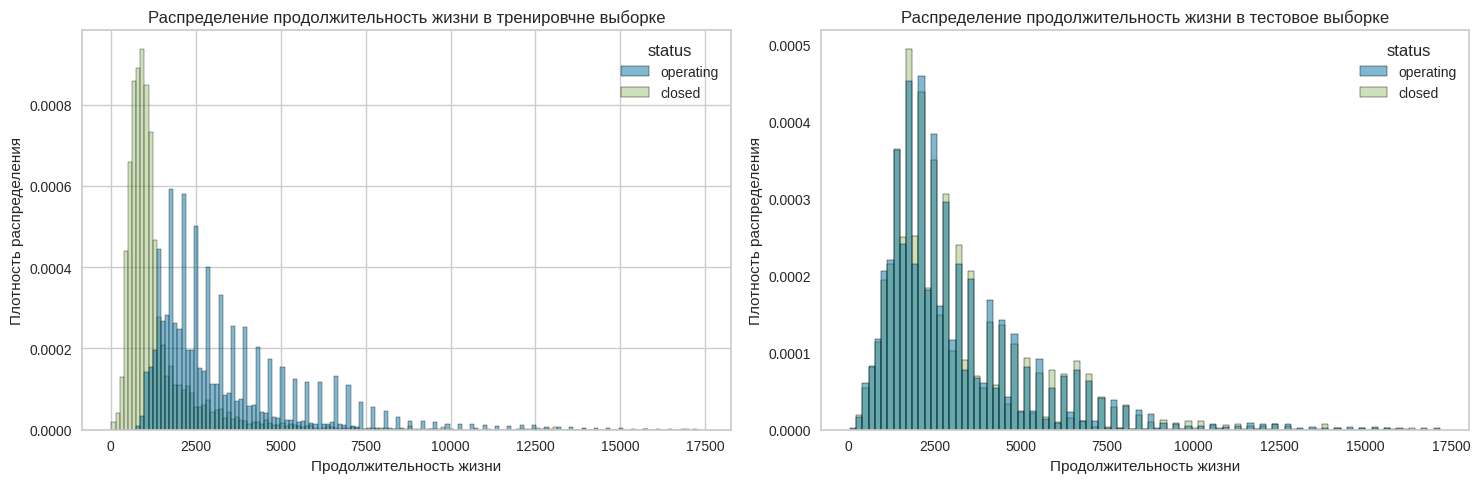

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes = axes.flatten()

dataframes = [X_train, X_test]

sample_type = ['в тренировчне выборке', 'в тестовое выборке']

for i, dataframe in enumerate(dataframes):

    if i == 0:
        sns.histplot(x=dataframe['lifetime'], color = 'skyblue',hue=dataframe['status'], \
                     hue_order=['operating', 'closed'], stat='density', common_norm=False, ax=axes[i])
    else:
        sns.histplot(x=dataframe['lifetime'], color = 'skyblue',hue=y_test['status'], \
                     hue_order=['operating', 'closed'], stat='density', common_norm=False, ax=axes[i])

    axes[i].set_title(f'Распределение продолжительность жизни {sample_type[i]}')

    axes[i].set_xlabel('Продолжительность жизни');
    axes[i].set_ylabel('Плотность распределения');
plt.grid();


plt.tight_layout()


plt.show()

Здесь графики совсем не похожы, и мы можем увидеть влияние продолжительности жизни на целевой признак во первом датасете.

Напротив, мы не можем провести различие между двумя классами, и понимать кто живут дольше во втором графике. Мы видим, что в тестовом наборе данных признак "lifetime" почти не влияет на целевую переменную.

Мы говорили что болинство стартапов не живуть болшее 5 лет, и мы видим в обойх графике что это может правда так как у болшиньсто стартапов продолжительность жизни меншее 1825 дней.

Ну сдезсь сложно осудить так как многих стартапов у которых есть меншее 5 летов. Можеть бы много из них будеть закрываеться скоро.


Но есть и кое-что еще, есть разница между датой основания и датой первого финансирования. Мы это не можем проверит в тестовом датасете потому не даты основании ну давайте проверяем с тренировочноы выборком.

In [ ]:
X_train['diff'] = (X_train['first_funding_at']-X_train['founded_at']).dt.days

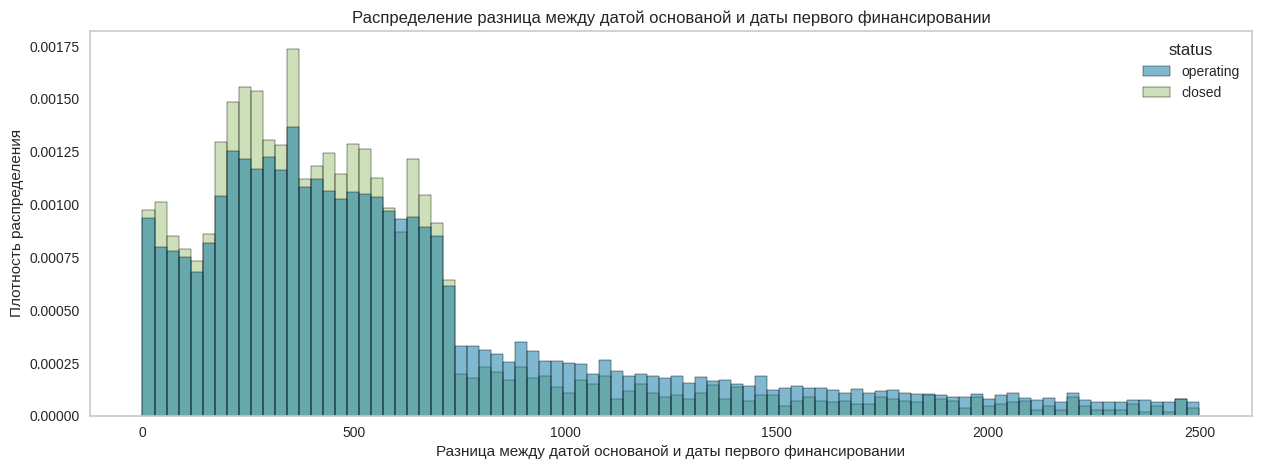

In [ ]:
fig, axes = plt.subplots(figsize=(15, 5))


sns.histplot(x=X_train.query('0 < diff < 2500')['diff'],hue=X_train['status'], \
hue_order=['operating', 'closed'], stat='density', common_norm=False, ax=axes)

axes.set_title(f'Распределение разница между датой основаной и даты первого финансировании')

axes.set_xlabel('Разница между датой основаной и даты первого финансировании');
axes.set_ylabel('Плотность распределения');
axes.grid();

plt.show()

Мы ясно видим, что у большинства стартапов первый раунд финансирования состоялся менее чем через 750 дней после их основания, то есть примерно через два года. Мы ясно видим, что здесь большая часть стартапов закончилась провалом. Однако по прошествии двух лет, меньше компаний начинают свое финансирование, но и среди них меньше неудачных стартапов, возможно, потому, что им потребовалось больше времени на подготовку. Гипотеза: Увеличивает ли более длительное время предварительной подготовки шансы стартапа на успех?

## Распеделенние доли перед раудом и последннии рауды

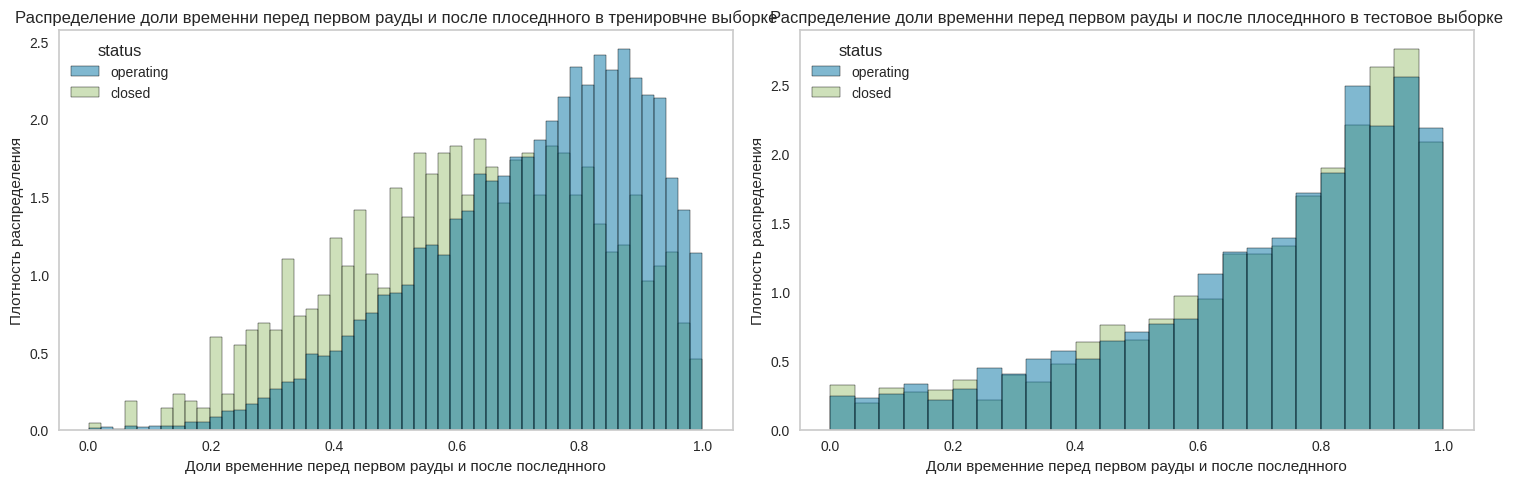

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes = axes.flatten()

dataframes = [X_train, X_test]

sample_type = ['в тренировчне выборке', 'в тестовое выборке']

for i, dataframe in enumerate(dataframes):

    if i == 0:
        sns.histplot(x=dataframe.query('pre_seed_last_round > 0 and pre_seed_last_round < 1')['pre_seed_last_round'], color = 'skyblue',hue=dataframe['status'], \
                     hue_order=['operating', 'closed'], stat='density', common_norm=False, ax=axes[i])
    else:
        sns.histplot(x=dataframe.query('pre_seed_last_round > 0 and pre_seed_last_round < 1')['pre_seed_last_round'], color = 'skyblue',hue=y_test['status'], \
                     hue_order=['operating', 'closed'], stat='density', common_norm=False, ax=axes[i])

    axes[i].set_title(f'Распределение доли временни перед первом рауды и после плоседнного {sample_type[i]}')

    axes[i].set_xlabel('Доли временние перед первом рауды и после последнного');
    axes[i].set_ylabel('Плотность распределения');
    axes[i].grid();


plt.tight_layout()


plt.show()

На первом графике мы видим компание, у которие было меньше времени на подготовку, и к последнему раунду склонялись к закрытию. На втором графике, опять же, поведение двух классов очень близко, поэтому трудно сказать как признак 'pre_seed_last_round' являет на целевую перемеррую.

Мы заметили некоторые аномалии, когда дата первого раунда наступала после даты основания. Это звучит невозможно. Мы можем думать их убирать.

In [ ]:
X_train.query('first_funding_at < founded_at')

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,...,countries,states,regions,cities,main_category,main_category_1,main_category_2,main_category_3,main_category_4,diff
34,Evargrah Entertainment Group,Entertainment|Games,NaN,operating,USA,CA,Los Angeles,Los Angeles,1,2013-08-13,...,USA,CA,Los Angeles,Los Angeles,Entertainment,Games,Unknown,Unknown,Unknown,-35
74,Box Upon a Time,Fashion|Retail,389454.0,operating,NaN,NaN,NaN,NaN,2,2014-04-01,...,NaN,NaN,NaN,NaN,Fashion,Retail,Unknown,Unknown,Unknown,-113
96,"Heartscape Technologies, Inc.",Healthcare Services|Medical Devices|Technology,18400000.0,closed,USA,NY,New York City,New York,2,2005-11-01,...,USA,NY,New York City,New York,Healthcare Services,Medical Devices,Technology,Unknown,Unknown,-22
110,Cohuman,Collaboration|Enterprise Software|Project Mana...,1400000.0,operating,USA,CA,SF Bay Area,San Francisco,2,2009-10-09,...,USA,CA,SF Bay Area,San Francisco,Collaboration,Enterprise Software,Project Management,Social Media,Unknown,-30
113,Kraftwurx,3D|3D Printing|DIY|E-Commerce|Mass Customizati...,1000000.0,operating,USA,TX,Houston,Cypress,2,2011-08-01,...,USA,TX,Houston,misc.,3D,3D Printing,DIY,E-Commerce,Mass Customization,-1948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52365,Spotplex,Curated Web,450000.0,closed,USA,CA,SF Bay Area,Santa Clara,1,2007-02-01,...,USA,CA,SF Bay Area,Santa Clara,Curated Web,Unknown,Unknown,Unknown,Unknown,-31
52374,COTA (Cancer Outcomes Tracking and Analysis),Health Care,7000000.0,operating,NaN,NaN,NaN,NaN,1,2014-10-01,...,NaN,NaN,NaN,NaN,Health Care,Unknown,Unknown,Unknown,Unknown,-8
52427,shots :),Android|iOS|iPhone|Mobile|Social Media|Teenagers,15200000.0,operating,USA,CA,SF Bay Area,San Francisco,3,2013-11-12,...,USA,CA,SF Bay Area,San Francisco,Android,iOS,iPhone,Mobile,Social Media,-11
52441,Tirendo,E-Commerce,NaN,operating,DEU,16,Berlin,Berlin,2,2011-10-01,...,DEU,16,Berlin,Berlin,E-Commerce,Unknown,Unknown,Unknown,Unknown,-273


# Исследованние распеделения категориального значения

## Распеделенние количество раунды финансирования

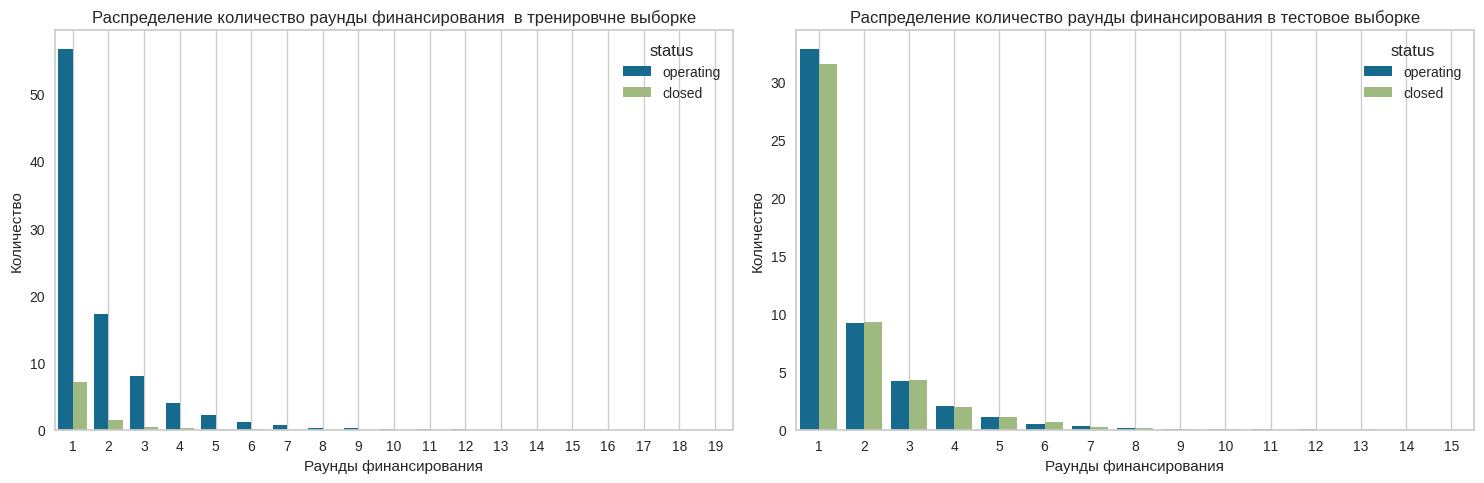

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes = axes.flatten()

dataframes = [X_train, X_test]

sample_type = [' в тренировчне выборке', 'в тестовое выборке']

for i, dataframe in enumerate(dataframes):

    if i == 0:
         sns.countplot(x=dataframe['funding_rounds'], hue=dataframe['status'], hue_order=['operating', 'closed'], stat='percent', ax=axes[i]);
    else:

        sns.countplot(x=dataframe['funding_rounds'], hue=y_test['status'], hue_order=['operating', 'closed'], stat='percent', ax=axes[i]);

    axes[i].set_title(f'Распределение количество раунды финансирования {sample_type[i]}')

    axes[i].set_xlabel('Раунды финансирования');
    axes[i].set_ylabel('Количество');
    axes[i].grid();


plt.tight_layout()


plt.show()

Очевидно, что в первом раунде будет больше компаний, потому что это первый и самый простой раунд для входа, но, вероятно, один из самых трудных для выхода, поскольку репутация компании еще не создана. Конечно, по мере увеличения количества раундов стартапов становится все меньше и меньше. К сожалению, мы почти не видим влияния количества раундов на классы целевой переменной в втором графике.



## Распеделенние частота категорий

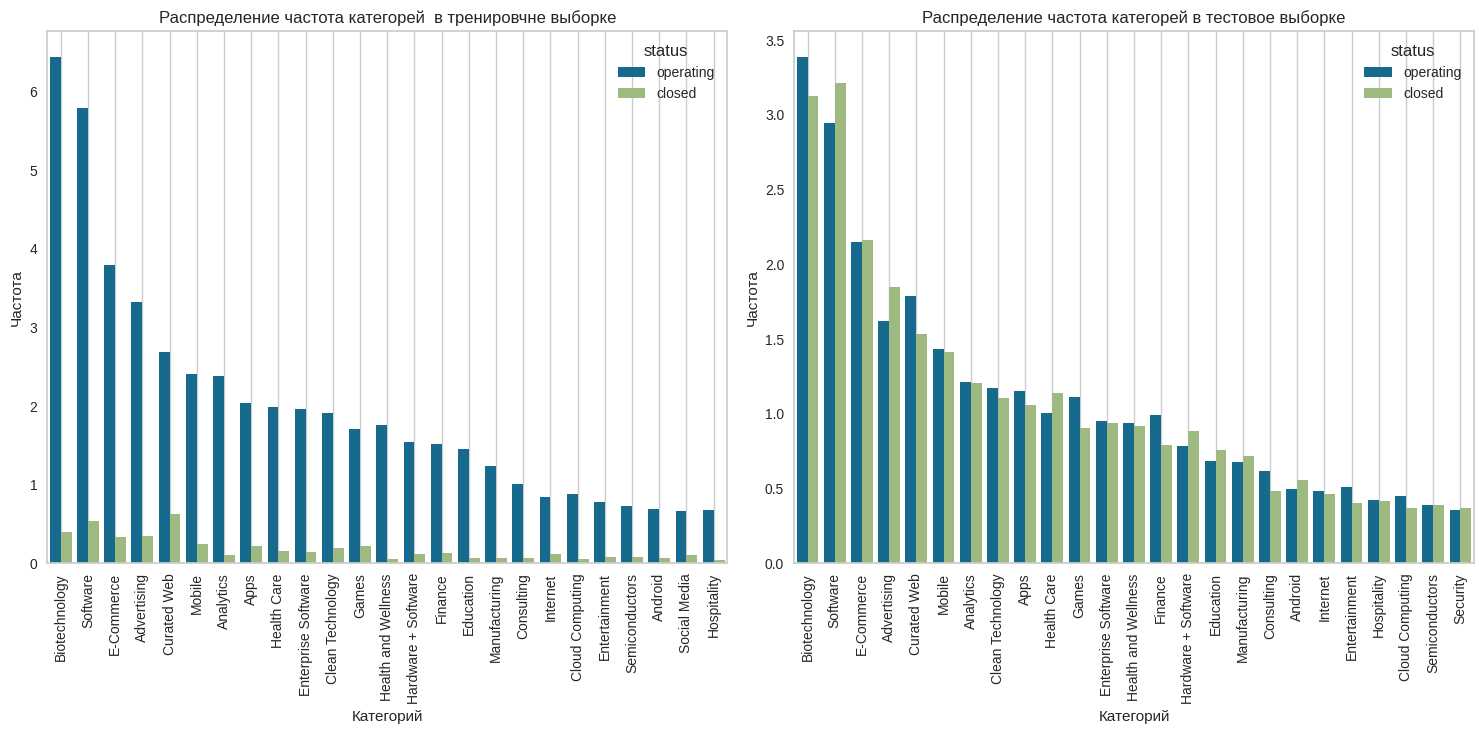

In [ ]:
fi, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7.5))

axes = axes.flatten()

dataframes = [X_train, X_test]

sample_type = [' в тренировчне выборке', 'в тестовое выборке']


for i, dataframe in enumerate(dataframes):
    if i == 0:
        list_cat = dataframe['main_category'].value_counts().index.to_list()[:25]
        index_cat = dataframe.query('main_category in @list_cat').index.to_list()


        sns.countplot(data=dataframe, x=dataframe.loc[index_cat,'main_category'], \
                      order=dataframe.loc[index_cat,'main_category'].value_counts()[:50].index, hue=dataframe['status'], \
                      hue_order=['operating', 'closed'], stat='percent', ax=axes[i]);
    else:
        list_cat = dataframe['main_category'].value_counts().index.to_list()[:25]
        index_cat = dataframe.query('main_category in @list_cat').index.to_list()


        sns.countplot(data=dataframe, x=dataframe.loc[index_cat,'main_category'], \
                      order=dataframe.loc[index_cat, 'main_category'].value_counts()[:50].index, hue=y_test['status'], \
                      hue_order=['operating', 'closed'], stat='percent', ax=axes[i]);

    axes[i].set_title(f'Распределение частота категорей {sample_type[i]}')
    axes[i].tick_params(axis='x', labelrotation=90)
    axes[i].set_xlabel('Категорий');
    axes[i].set_ylabel('Частота');
    axes[i].grid();


plt.tight_layout()


plt.show()

Стартапы больше всего работают в сфере Biothechnology, Software а затем E-commerce. Мы ясно видим дисбаланс наших данных в тренировочном датасета. Во втором графике, разница между работающейвся компанией и закрытой компанией очень мала.

## Распеделенние местоположение

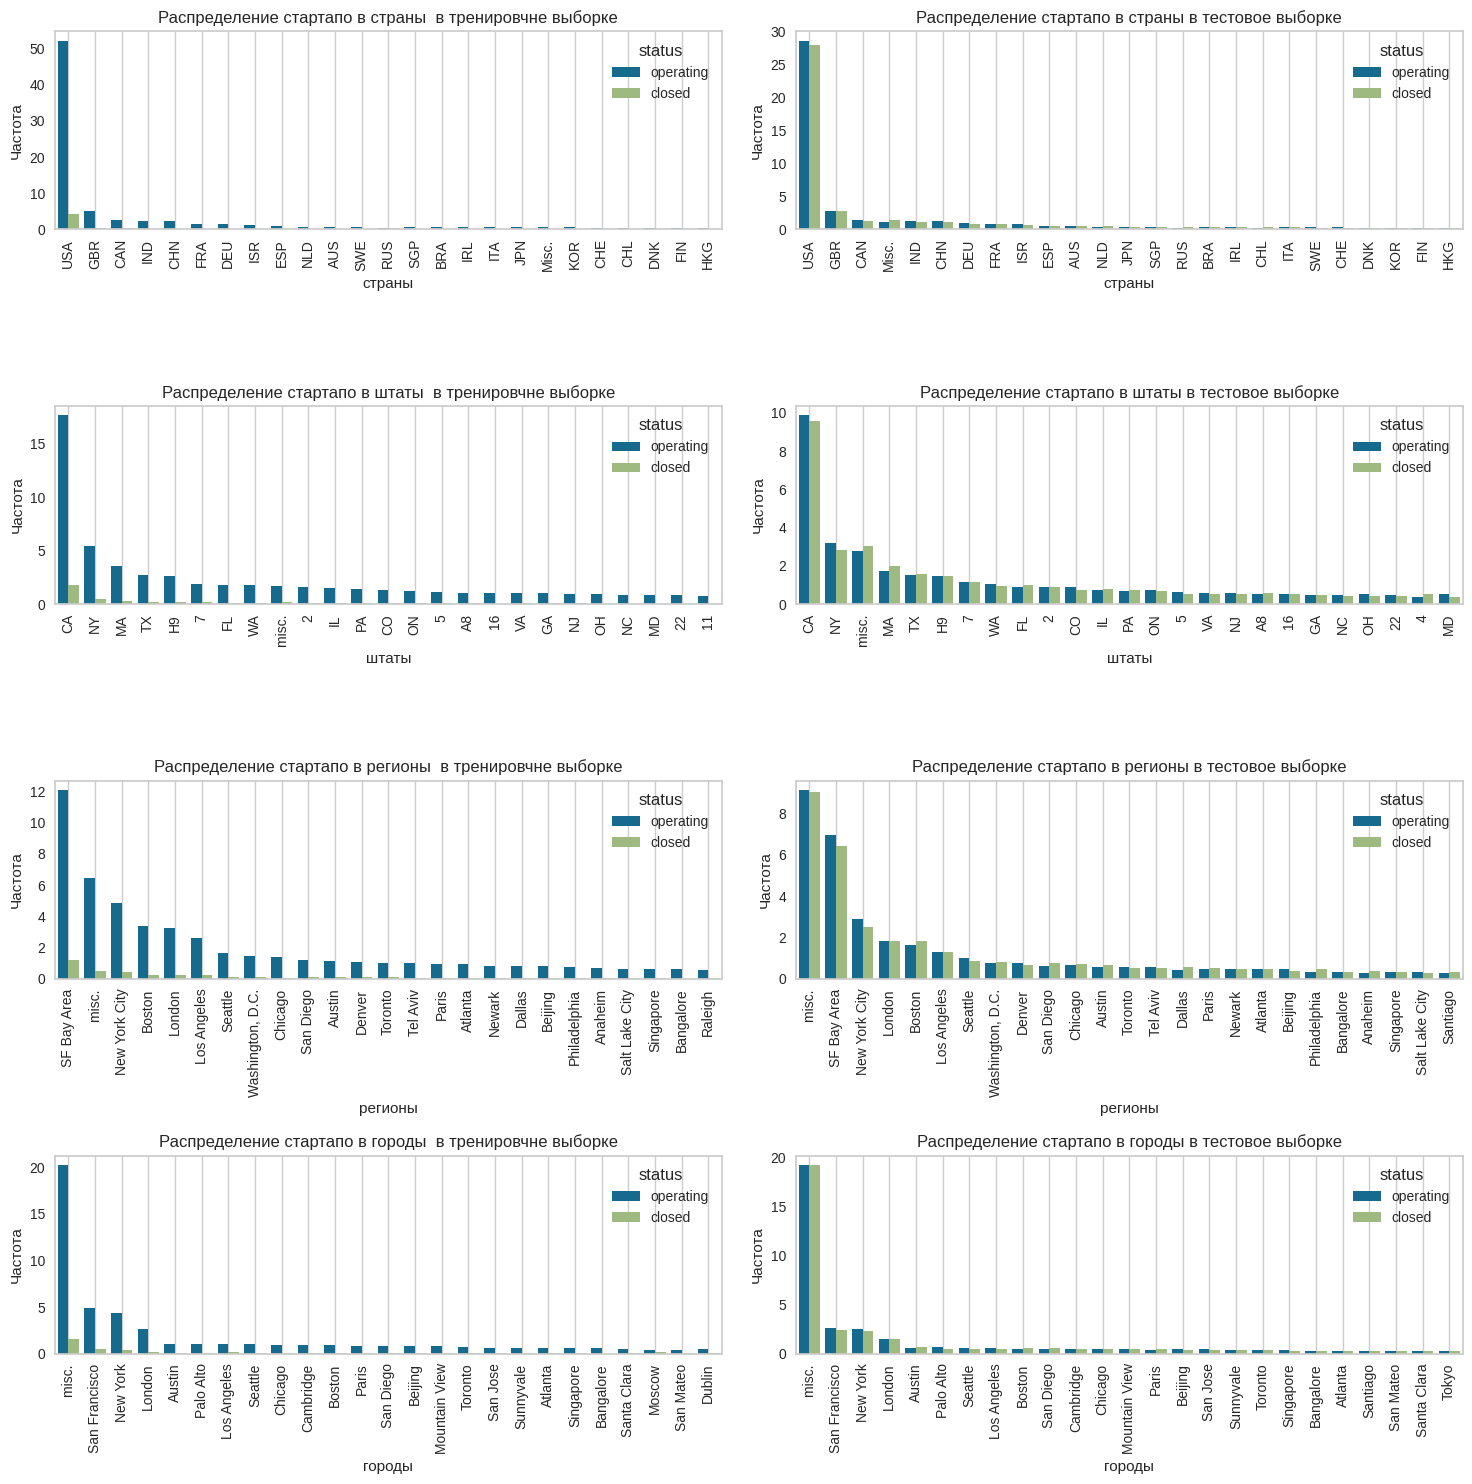

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

axes = axes.flatten()

dataframes = [X_train, X_test]

sample_type = [' в тренировчне выборке', 'в тестовое выборке']
columns = ['countries', 'states', 'regions', 'cities']
column_names = ['страны', 'штаты', 'регионы', 'городы']
column_names_2 = ['странах', 'штатах', 'регионах', 'городах']


for i, col in enumerate(columns):
  for j, dataframe in enumerate(dataframes):
    if j == 0:
        list_coun = dataframe[col].value_counts().index.to_list()[:25]
        index_coun = dataframe.query('{0} in @list_coun'.format(col)).index.to_list()


        sns.countplot(data=dataframe, x=dataframe.loc[index_coun,col], \
                      order=dataframe.loc[index_coun,col].value_counts()[:25].index, hue=dataframe['status'], \
                      hue_order=['operating', 'closed'], stat='percent', ax=axes[2*i+j]);
    else:
        list_coun = dataframe[col].value_counts().index.to_list()[:25]
        index_coun = dataframe.query('{0} in @list_coun'.format(col)).index.to_list()


        sns.countplot(data=dataframe, x=dataframe.loc[index_coun,col], \
                      order=dataframe.loc[index_coun,col].value_counts()[:25].index, hue=y_test['status'], \
                      hue_order=['operating', 'closed'], stat='percent', ax=axes[2*i+j]);

    axes[2*i+j].set_title(f'Распределение стартапо в {column_names[i]} {sample_type[j%2]}')
    axes[2*i+j].tick_params(axis='x', labelrotation=90)
    axes[2*i+j].set_xlabel(f'{column_names[i]}');
    axes[2*i+j].set_ylabel('Частота');
    axes[2*i+j].grid();


plt.tight_layout()


plt.show()

Здесь мы также видим, что Америка является наиболее представленной страной, Калифорния - наиболее представленным штатом, Район залива Сан-Франциско - наиболее представленным регионом и  Misc. - наиболее представленным городом,  ну должно было бы Сан-Франциско.Потомучто понятно сейчас что большая часть стартапов из наших наборов данных - из Кремниевой долины. Здесь кокда мы групмровали на групы Misc. мы исказили данные. Например, для признак 'regions', 'Misc.' второй.

Однако мы замечаем, что чем больше географическая зона, тем меньше группа 'Misc.' это означает, что страны — наш более надежный признак для локализации.
Меньшие зоны, более дата изскаженое в основном регионы и города. Hам пришлось сгруппировать реже встречающиеся регионы и города вместе, чтобы избежать переобучения нашей модели из-за слишком большого количества одиночных значений, ну видно что мы сейчас не можем их исползовать для МО.

Однако это не проблемы, потому что все эти признаки повторяют тот же информации для местоположение. Тогда лучее взять страну так как у него меншее пропусков чем других признаков для местоположении.

## Распеделенние по временни

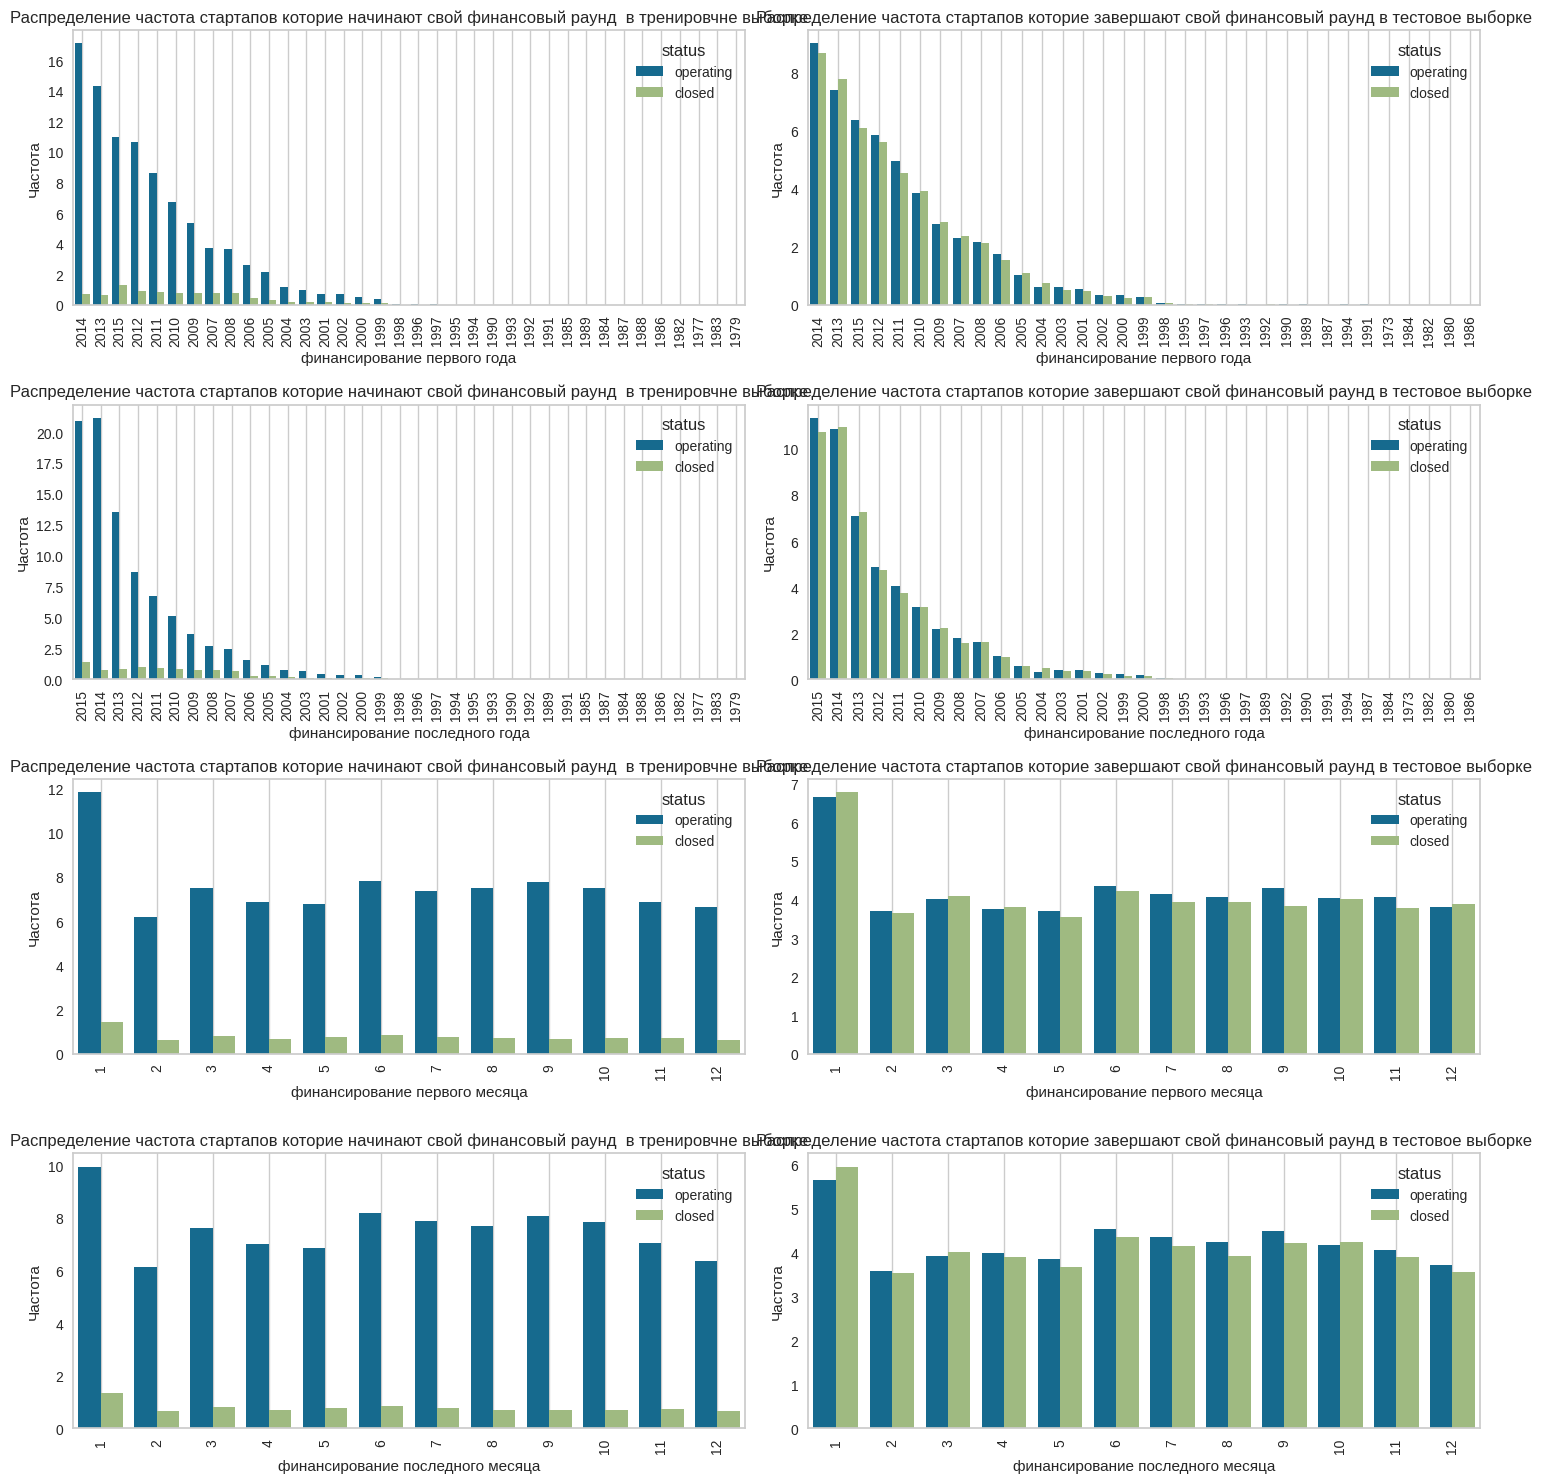

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

axes = axes.flatten()

dataframes = [X_train, X_test]

sample_type = [' в тренировчне выборке', 'в тестовое выборке']
columns = ['first_funding_year', 'last_funding_year', 'first_funding_month', 'last_funding_month']
column_names = ['финансирование первого года', 'финансирование последного года', \
                'финансирование первого месяца', 'финансирование последного месяца']
in_out = ['начинают свой финансовый раунд', 'завершают свой финансовый раунд']

for i, col in enumerate(columns):
  for j, dataframe in enumerate(dataframes):
    if j == 0:

        sns.countplot(data=dataframe, x=dataframe[col], \
                      order=range(1,13) if i>1 else dataframe[col].value_counts().index, hue=dataframe['status'], \
                      hue_order=['operating', 'closed'], \
                      stat='percent', ax=axes[2*i+j]);
    else:

        sns.countplot(data=dataframe, x=dataframe[col], \
                      order=range(1,13) if i>1 else dataframe[col].value_counts().index, hue=y_test['status'], \
                      hue_order=['operating', 'closed'], \
                      stat='percent', ax=axes[2*i+j]);

    axes[2*i+j].set_title(f'Распределение частота стартапов которие {in_out[j%2]} {sample_type[j%2]}')
    axes[2*i+j].tick_params(axis='x', labelrotation=90)
    axes[2*i+j].set_xlabel(f'{column_names[i]}');
    axes[2*i+j].set_ylabel('Частота');
    axes[2*i+j].grid();


plt.tight_layout()


plt.show()

Мы говорили что болинство стартапов не живуть болшее 5 лет, видно здесь что эьо сложно осудить так у многих начиналось финансированое недавно по сравню дата выпускы датасета. Мы можем судить только 43% данных по этой гипотезе.

In [ ]:
len(X_train[X_train['first_funding_year']<2012])/len(X_train)

0.4338487318150659

57% наших данных — это компании, у которых все еще могут быть закрыты шансы в соответствии с упомянутым нами состоянием.

In [ ]:
len(X_test[X_test['first_funding_year']<2012])/len(X_test)

0.4310095238095238

## Вывод

Похоже, что большая часть нашего распределения не является нормальным распределением, а распределением Пуассона, поскольку здесь задействовано время.

Мы отметили во время исследовательского аналз данных много выбросов, много компаний, которые зарабатывают много денег, и компаний, которые имеют очень долгую жизнь, и они не обязательно одинаковы. Компании у которых много денег, как правило, затмевают молодые стартапы и стартапы с гораздо меньшими деньгами. Однако мы не можем от этих выбросов избавиться, эти стартапы не являются аномалией.

Следующее, мы замечали что в наборе тренировоных данных, признак "lifetime" оказалось большое влияние на целевую переменную, чем total_funding_year.

Мы оставили это в конце, но самое важное, что мы заметили, это то, что мы видели ранее при EDA: дисбаланс нашей целевой переменной в тренировочном данных и чрезвычайно хорошо сбалансированной классов в целевой переменной в тестовом датасета.

Дисбаланс 90%-10% в наборе тренировочных данных может стать проблемой, которую можно решить с помощью некоторых методов, таких как SMOTE или добавление опции class_weight в наши модели, чтобы модель не слишком отдавала предпочтение к крупному классу "operating".
Хорошо сбалансированные классы в нашем тестовом наборе данных также являются проблемой, поскольку нашей модели тоже не за что будет 'захватывать'. Например, мы видели среди выбросов что баланс классов 50-50 соханилось. В ходе изучения распределения различных признаков мы заметили, что большую часть времени, это хорошый баланс классов тоже соханилось. Этот слишком хороший баланс будет проблемой для модели, поскольку у нее нет никакого способа различить разницу между классами.

Проблема не в том, что в нашем тестовом наборе данных было,баланс классов 50-50, а в том, что эти классы ведут себя одинаково в зависимости от разных признаков.

# Корреляционный анализ

In [ ]:
# Let's prepare our dataset for the modelisation
X_train_corr = X_train.drop(['name', 'category_list','country_code', 'state_code', 'region', 'city', \
                          'founded_at','first_funding_at','last_funding_at', 'closed_at', 'main_category_3', 'main_category_4'], axis=1)

In [ ]:
# Let's prepare our dataset for the modelisation
X_test_corr = X_test.drop(['name', 'category_list','country_code', 'state_code', 'region', 'city', \
                        'first_funding_at','last_funding_at', 'main_category_3', 'main_category_4'], axis=1)
# Let's add the target to our dataframe
X_test_corr['status'] = y_test['status']

In [ ]:
interval_cols = ['funding_total_usd', 'lifetime',  'first_funding_year', 'last_funding_year', 'pre_seed_last_round', 'diff']

# Вычисление матрицы корреляции с использованием phik
corr_matrix = X_train_corr.sample(frac=0.1).phik_matrix(interval_cols=interval_cols)

# Визуализация матрицы
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='crest');
plt.title('Phi_K Correlation Matrix')
plt.show()

KeyboardInterrupt: 

Мы укрепили признак 'diff' зная что мы его не можем исползовать, ну просто видеть как он являеться на целевое признак.

Если мы посмотрим на матрицу, то увидим, что 'lifetime' оказывает наибольшее влияние на целевую переменную. Только fund_total_usd вообще не оказывает никакого влияния на целевую переменную. Однако 'subcategories', 'first_funding_month' и 'last_funding_round_month' имеют очень низкое влияние.

In [ ]:
X_test['diff'] = (X_test['last_funding_at'] - X_test['first_funding_at']).dt.days
X_test_corr['diff'] = X_test['diff']

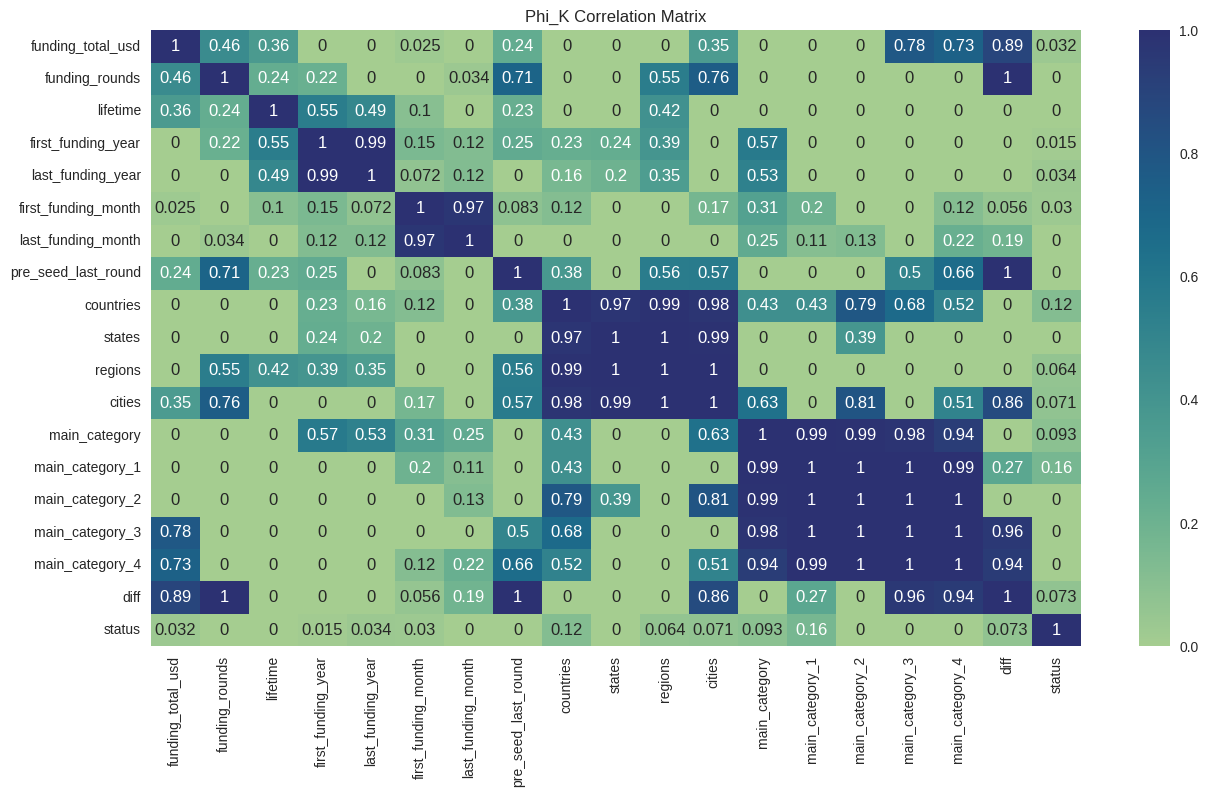

In [ ]:
interval_cols = ['funding_total_usd', 'lifetime',  'first_funding_year', 'last_funding_year', 'pre_seed_last_round']

# Вычисление матрицы корреляции с использованием phik
corr_matrix = X_test_corr.sample(frac=0.1).phik_matrix(interval_cols=interval_cols)

# Визуализация матрицы
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='crest');
plt.title('Phi_K Correlation Matrix')
plt.show()

В нашем тренировочной данных нет действительно влиятельных переменных, что является проблемой, поскольку мы можем не получить хорошый результат, когда запустим нашу модель.

## Вывод

Что бы модел не переобучилась мы отобираем самы нужны признаки.

Так как все признаки для местоположении коллинеарный, мы выбрали только один - 'countries'. У этого признакы по сравню 'states', 'regions' и 'cities' меншее других, пропусков и меншее других унникальние значение. Так будет ещё меншее шансы получит искаженные данные  после  метода Imputer.

Для временни мы отобрали признак : 'last_funding_year' и 'first_funding_month'. Не выбрали 'last_funding_month' и 'first_funding_year' из за коллинеарност.

Так как у diff более значительный на 'status' чем pre_seed_last_round и у них обой разница между last_funding_at и first_funding_at. Так как мы 'diff' возмём мы не будем взять last funding year, first funding month.

Пока возмем толко 3 от 5 признаков категорий.

Вот наши отобранные признаки:

- lifetime
- countries
- funding_total_usd
- funding_rounds
- main_category
- main_category_1
- main_category_2
- diff


# Пайплайн

Мы увидели, что наша целевой признак несбалансирован, и нам следует использовать метод oversampling, например SMOTETomek (SMOTENC из-за этого наш расчет приостоновился). Однако обсуждалось, что такая техника не так эффективна, и люди склонны компенсировать дисбаланс своими данными с помощью boodting алгоритма, что мы и собираемся сделать с использованием LGBM.

Что касается кодировки, поскольку у нас много одиночных значений, нам нужно как следует подумать, как их закодировать. Чтобы избежать размерного проклятия, у нас есть большой выбор кодировщика: frequency encoder, target encoder, hashing encoder. Поскольку мы собираемся использовать CatBoost для нашей модели машинного обучения, мы собираемся использовать кодировщик CatBoost, целевой кодировщик, который хорошо работает в нашем случае.

По поводу пропусков, мы будем исползовать SimpleImputer с стратегой 'most frequent' для категорялных значеных и для количественных значеных KNNImputer.

Для моделировании мы будем исползовать :

-LightGBMClassifier
-BalancedRandomForestClassifier



Дупликаты взяты из раундов финансирования, поэтому мы не собираемся их удалять.

In [ ]:
# Let's prepare dataset for the modelisation
X_train_m = X_train_corr.drop(['status', 'states', 'regions',  'cities', 'first_funding_year', 'last_funding_year', 'first_funding_month','last_funding_month', 'pre_seed_last_round'], axis=1)

X_test_m = X_test_corr.drop(['status', 'states', 'regions',  'cities', 'first_funding_year', 'last_funding_year', 'first_funding_month','last_funding_month',  'pre_seed_last_round'], axis=1)


In [ ]:
# Подготовим наш целевой признак к моделированию
y_train_m = X_train_corr['status']

# Констант
RANDOM_STATE=42

# создаём списки с названиями признаков
cat_columns = ['countries', 'main_category', 'main_category_1', 'main_category_2']

num_columns = ['funding_total_usd', 'funding_rounds', 'lifetime', 'diff']

#cnt_encoder = ce.count.CountEncodear()
cbe_encoder = ce.cat_boost.CatBoostEncoder()
loo_encoder = ce.leave_one_out.LeaveOneOutEncoder()
woe_encoder = ce.woe.WOEEncoder()

# Кодируем нашу целевую переменную
le = LabelEncoder()
y_train_le = le.fit_transform(y_train_m)
y_test_le = le.transform(y_test['status'])

# создаём пайплайн для категорильного значения
cat_pipe = Pipeline([
    ('imp_1', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('enc', cbe_encoder)
])

num_pipe = Pipeline([
    ('imp', KNNImputer(n_neighbors=5)),
    ('scal', MinMaxScaler())#,
    #('poly', PolynomialFeatures(2, include_bias=False))
])

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('cat', cat_pipe, cat_columns),
     ('num', num_pipe, num_columns)
    ],
    remainder='passthrough'
)

smote_tomek = SMOTETomek(sampling_strategy='auto')

In [ ]:
# создаём итоговый пайплайн: подготовка данных и модель
pipe = Pipeline([
    ('preprocessor', data_preprocessor),
    ('smote', smote_tomek),
    ('models', [lgb.LGBMClassifier(random_state=RANDOM_STATE)])
])

param_grid = [
    {
        'models': [lgb.LGBMClassifier(random_state=RANDOM_STATE)],
        'models__n_estimators': [1000],
        'models__verbosity': [-1],
        'models__bagging_freq': [1],
        'models__learning_rate': [1e-3, 0.1],
        'models__num_leaves': [2, 2**10],
        'models__max_depth':[3,12],
        'models__subsample': [0.05, 1.0],
        'models__colsample_bytree': [0.05, 1.0],
        'models__class_weight': ['balanced', None],
        'models__min_data_in_leaf': [1, 100],
        # 'models__lambda_l1': [0, 100, 5], # Regularization
        # 'models__lambda_l2': [0, 100, 5], # Regularization
       'preprocessor__cat__imp_1': [SimpleImputer(missing_values=np.nan, \
                                                 strategy='most_frequent'), \
                                  SimpleImputer(missing_values=np.nan, \
                                                 strategy='constant', fill_value='Unknown')],
        'preprocessor__cat__enc': [woe_encoder, cbe_encoder],
        'preprocessor__num__scal': [StandardScaler(), \
                                    MinMaxScaler()],
        'smote':[SMOTETomek(sampling_strategy='all'), \
                 SMOTETomek(sampling_strategy='auto'), None]
    },
    # dict for BalancedRandomForestClassifier()
      {'models':[BalancedRandomForestClassifier(replacement=True, sampling_strategy='all',
                                                 random_state=RANDOM_STATE)],
      'models__n_estimators': [25, 33, 41, 48, 56, 64, 80, 92],
      'models__max_features': range(2,14),
      'models__min_samples_split':range(2,14),
      'models__min_samples_leaf':range(1,14),
      'models__max_depth': range(2,14),
      'models__bootstrap': [True, False],
      'models__class_weight': ['balanced', 'balanced_subsample'],
       'preprocessor__cat__imp_1': [SimpleImputer(missing_values=np.nan, \
                                                 strategy='most_frequent'), \
                                  SimpleImputer(missing_values=np.nan, \
                                                 strategy='constant', fill_value='Unknown')],
        'preprocessor__cat__enc': [woe_encoder, cbe_encoder],
        'preprocessor__num__scal': [StandardScaler(), \
                                    MinMaxScaler()],
        'smote':[SMOTETomek(sampling_strategy='all'), \
                 SMOTETomek(sampling_strategy='auto'), None]
       }

]
randomized_search = RandomizedSearchCV(
    pipe,
    param_grid,
    cv=5,
    scoring='f1',
    random_state=RANDOM_STATE,
    error_score="raise",
    n_jobs=-1
)
randomized_search.fit(X_train_m, y_train_le)

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=Pipeline(memory=None,
                                      steps=[('preprocessor',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='passthrough',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('cat',
                                                                               Pipeline(memory=None,
                                                                                        steps=[('imp_1',
                                                                                                SimpleImputer(add_indicator=False,
                                                                                                              copy=True,
                                                                                                              fill_value=None,
                                                                                                              keep_empty_features=False,
                                                                                                              missing_...
                                                                                    with_std=True),
                                                                     MinMaxScaler(clip=False,
                                                                                  copy=True,
                                                                                  feature_range=(0,
                                                                                                 1))],
                                         'smote': [SMOTETomek(n_jobs=None,
                                                              random_state=None,
                                                              sampling_strategy='all',
                                                              smote=None,
                                                              tomek=None),
                                                   SMOTETomek(n_jobs=None,
                                                              random_state=None,
                                                              sampling_strategy='auto',
                                                              smote=None,
                                                              tomek=None),
                                                   None]}],
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring='f1', verbose=0)

In [ ]:
# Итог гиперпараметр тюнинг
report_randomised_search = pd.DataFrame(randomized_search.cv_results_)
pd.set_option('display.max_colwidth', None)
report_randomised_search.sort_values('rank_test_score', ascending=True)[['param_models', 'params', \
                                                                          'mean_test_score', 'std_test_score', \
                                                                          'rank_test_score']].head(3)

,param_models,params,mean_test_score,std_test_score,rank_test_score
6,"BalancedRandomForestClassifier(bootstrap='warn', ccp_alpha=0.0,\n class_weight=None, criterion='gini',\n max_depth=None, max_features='sqrt',\n max_leaf_nodes=None, max_samples=None,\n min_impurity_decrease=0.0, min_samples_leaf=1,\n min_samples_split=2,\n min_weight_fraction_leaf=0.0, monotonic_cst=None,\n n_estimators=100, n_jobs=None, oob_score=False,\n random_state=42, replacement=True,\n sampling_strategy='all', verbose=0,\n warm_start=False)","{'smote': SMOTETomek(n_jobs=None, random_state=None, sampling_strategy='all', smote=None, tomek=None), 'preprocessor__num__scal': StandardScaler(copy=True, with_mean=True, with_std=True), 'preprocessor__cat__imp_1': SimpleImputer(add_indicator=False, copy=True, fill_value=None, keep_empty_features=False, missing_values=nan, strategy='most_frequent'), 'preprocessor__cat__enc': CatBoostEncoder(a=1, cols=None, drop_invariant=False, handle_missing='value', handle_unknown='value', random_state=None, return_df=True, sigma=None, verbose=0), 'models__n_estimators': 92, 'models__min_samples_split': 8, 'models__min_samples_leaf': 2, 'models__max_features': 9, 'models__max_depth': 10, 'models__class_weight': 'balanced_subsample', 'models__bootstrap': True, 'models': BalancedRandomForestClassifier(bootstrap='warn', ccp_alpha=0.0, class_weight=None, criterion='gini', max_depth=None, max_features='sqrt', max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, monotonic_cst=None, n_estimators=100, n_jobs=None, oob_score=False, random_state=42, replacement=True, sampling_strategy='all', verbose=0, warm_start=False)}",0.979660,0.000763,1
5,"BalancedRandomForestClassifier(bootstrap='warn', ccp_alpha=0.0,\n class_weight=None, criterion='gini',\n max_depth=None, max_features='sqrt',\n max_leaf_nodes=None, max_samples=None,\n min_impurity_decrease=0.0, min_samples_leaf=1,\n min_samples_split=2,\n min_weight_fraction_leaf=0.0, monotonic_cst=None,\n n_estimators=100, n_jobs=None, oob_score=False,\n random_state=42, replacement=True,\n sampling_strategy='all', verbose=0,\n warm_start=False)","{'smote': SMOTETomek(n_jobs=None, random_state=None, sampling_strategy='all', smote=None, tomek=None), 'preprocessor__num__scal': StandardScaler(copy=True, with_mean=True, with_std=True), 'preprocessor__cat__imp_1': SimpleImputer(add_indicator=False, copy=True, fill_value='Unknown', keep_empty_features=False, missing_values=nan, strategy='constant'), 'preprocessor__cat__enc': CatBoostEncoder(a=1, cols=None, drop_invariant=False, handle_missing='value', handle_unknown='value', random_state=None, return_df=True, sigma=None, verbose=0), 'models__n_estimators': 41, 'models__min_samples_split': 9, 'models__min_samples_leaf': 5, 'models__max_features': 5, 'models__max_depth': 7, 'models__class_weight': 'balanced', 'models__bootstrap': False, 'models': BalancedRandomForestClassifier(bootstrap='warn', ccp_alpha=0.0, class_weight=None, criterion='gini', max_depth=None, max_features='sqrt', max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, monotonic_cst=None, n_estimators=100, n_jobs=None, oob_score=False, random_state=42, replacement=True, sampling_strategy='all', verbose=0, warm_start=False)}",0.979047,0.001209,2
0,"BalancedRandomForestClassifier(bootstrap='warn', ccp_alpha=0.0,\n class_weight=None, criterion='gini',\n max_depth=None, max_features='sqrt',\n max_leaf_nodes=None, max_samples=None,\n min_impurity_decrease=0.0, min_samples_leaf=1,\n min_samples_split=2,\n min_weight_fraction_leaf=0.0, monotonic_cst=None,\n n_estimators=100, n_jobs=None, oob_score=False,\n random_state=42, replacement=True,\n sampling_strategy='all', verbose=0,\n warm_start=False)","{'smote': SMOTETomek(n_jobs=None, random_state=None, sampling_strategy='all', smote=None, tomek=None), 'preprocessor__num__scal': S

In [ ]:
model = randomized_search.best_estimator_
model

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cat',
                                                  Pipeline(memory=None,
                                                           steps=[('imp_1',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 keep_empty_features=False,
                                                                                 missing_values=nan,
                                                                                 strategy='most_frequent')),
                                                                  ('enc',
                                                                   CatBoostE...
                                                class_weight='balanced_subsample',
                                                criterion='gini', max_depth=10,
                                                max_features=9,
                                                max_leaf_nodes=None,
                                                max_samples=None,
                                                min_impurity_decrease=0.0,
                                                min_samples_leaf=2,
                                                min_samples_split=8,
                                                min_weight_fraction_leaf=0.0,
                                                monotonic_cst=None,
                                                n_estimators=92, n_jobs=None,
                                                oob_score=False,
                                                random_state=42,
                                                replacement=True,
                                                sampling_strategy='all',
                                                verbose=0, warm_start=False))],
         verbose=False)

# Анализ важности признаков

## С помощю SelecKBest

In [ ]:
# Let's prepare our training dataset with the data_preprocessort pipe
X_train_pipe = data_preprocessor.fit_transform(X_train_m, y_train_le)
#X_train_pipe_column_names = data_preprocessor.get_feature_names_out()
X_train_pipe_column_names = cat_columns + num_columns
X_train_pipe = pd.DataFrame(X_train_pipe, columns = X_train_pipe_column_names)

In [ ]:
# Let's prepare our test dataset with the data_preprocessort pipe
X_test_pipe = data_preprocessor.transform(X_test_m)
#X_test_pipe_column_names = data_preprocessor.get_feature_names_out()
X_test_pipe_column_names = cat_columns + num_columns
X_test_pipe = pd.DataFrame(X_test_pipe, columns = X_test_pipe_column_names)

In [ ]:
selector = SelectKBest(f_classif, k=8)

# обучаем SelectKBest
selector.fit(X_train_pipe, y_train_le)

# сформируйте выборки с лучшими признаками
features_names = X_train_pipe.columns[selector.get_support(indices=True)]
X_train_new = X_train_pipe[list(features_names)]
X_test_new = X_test_pipe[list(features_names)]
#print(features_names)

model_ = BalancedRandomForestClassifier(bootstrap=True,
                               class_weight='balanced_subsample', max_depth=10,
                               max_features=9, min_samples_leaf=2,
                               min_samples_split=8, n_estimators=92,
                               random_state=42, replacement=True,
                               sampling_strategy='all')

model_.fit(X_train_new, y_train_le)

BalancedRandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                               class_weight='balanced_subsample',
                               criterion='gini', max_depth=10, max_features=9,
                               max_leaf_nodes=None, max_samples=None,
                               min_impurity_decrease=0.0, min_samples_leaf=2,
                               min_samples_split=8,
                               min_weight_fraction_leaf=0.0, monotonic_cst=None,
                               n_estimators=92, n_jobs=None, oob_score=False,
                               random_state=42, replacement=True,
                               sampling_strategy='all', verbose=0,
                               warm_start=False)

## С помощю permutation importance

            Features  Importance
5     funding_rounds         668
2    main_category_1         787
3    main_category_2         808
1      main_category         864
0          countries         870
4  funding_total_usd        1048
7               diff        2248
6           lifetime        3205


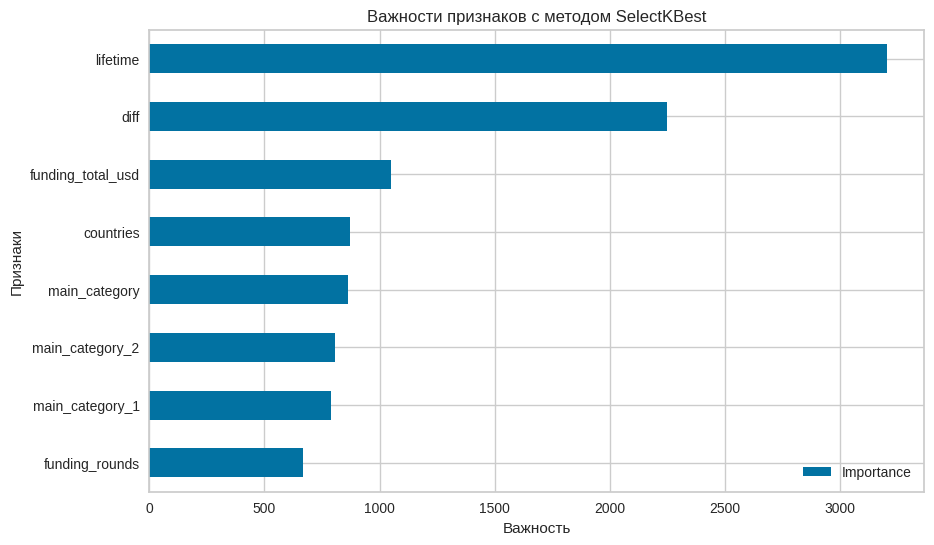

In [ ]:
# отложим значения коэффициентов на графике
coefficients = model_.feature_importances_
features_importance = pd.DataFrame({'Features': features_names, 'Importance': np.abs(coefficients)})
features_importance = features_importance.sort_values('Importance',ascending=True)
print(features_importance)
plot_features_importance = features_importance.plot(x='Features', \
                                                    y='Importance',\
                                                    kind='barh', figsize=(10, 6));
plt.title('Важности признаков с методом SelectKBest'),
plt.xlabel('Важность');
plt.ylabel('Признаки');

С методом SKbest feature_importance видим что у нас

1 очень важный признак:
- продолжительност жизни

1 важный признак:
- разница между датами раунды

Есть 4 слабо влияющих признака, в порядке значимости:

- общее финансирование
- страны
- катагорие
- катагорие второй
- катагорие первой
- количество раундов


            Features  Importance
2    main_category_1    0.000049
1      main_category    0.000076
3    main_category_2    0.000109
0          countries    0.000348
4  funding_total_usd    0.003196
5     funding_rounds    0.003424
7               diff    0.008723
6           lifetime    0.013666


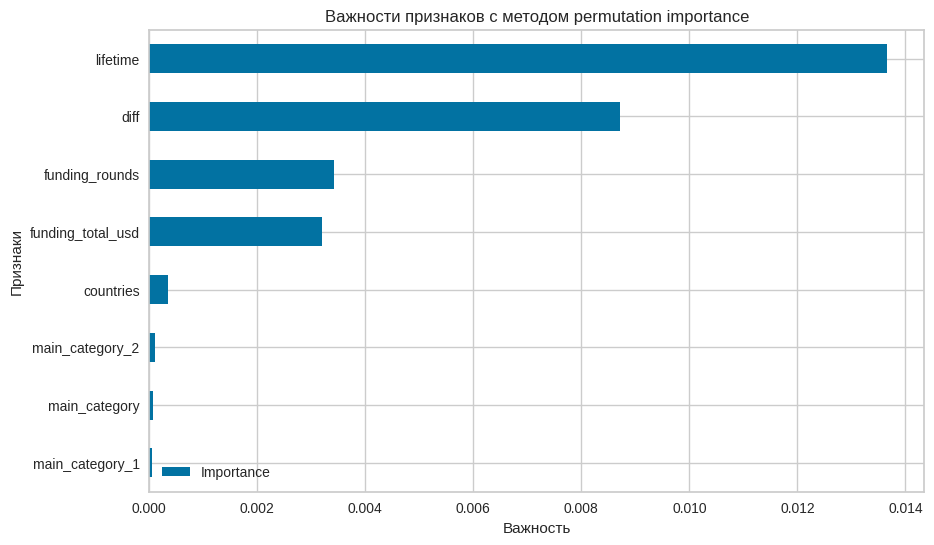

In [ ]:
# Permuation_importance
result = permutation_importance(model_, X_test_new, y_test_le, scoring='f1')

features_importance_permutation = pd.DataFrame({'Features': features_names, \
                                                'Importance': np.abs(result['importances_mean'])})
features_importance_permutation = features_importance_permutation.sort_values('Importance', ascending=True)
print(features_importance_permutation)
plot_feature_importance_permutation = features_importance_permutation.plot(x='Features', y='Importance', \
                                                                           kind='barh', figsize=(10, 6));

plt.title('Важности признаков с методом permutation importance'),
plt.xlabel('Важность');
plt.ylabel('Признаки');

# Второя кросс-валидация

Убираем 'main_category_1' и посмотрим если качество улучилось.

In [ ]:
X_train_m_1 = X_train_m.drop(['main_category_1'], axis=1)

In [ ]:
X_test_m_1 = X_test_m.drop(['main_category_1'], axis=1)

In [ ]:
# Подготовим наш целевой признак к моделированию
y_train_m = X_train_corr['status']

# Констант
RANDOM_STATE=42

# создаём списки с названиями признаков
cat_columns = ['countries', 'main_category_2', 'main_category']

num_columns = ['funding_total_usd', 'funding_rounds', 'lifetime', 'diff']

#cnt_encoder = ce.count.CountEncodear()
cbe_encoder = ce.cat_boost.CatBoostEncoder()
loo_encoder = ce.leave_one_out.LeaveOneOutEncoder()
woe_encoder = ce.woe.WOEEncoder()

# Кодируем нашу целевую переменную
le = LabelEncoder()
y_train_le = le.fit_transform(y_train_m)
y_test_le = le.transform(y_test['status'])

# создаём пайплайн для категорильного значения
cat_pipe = Pipeline([
    ('imp_1', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('enc', cbe_encoder)
])

num_pipe = Pipeline([
    ('imp', KNNImputer(n_neighbors=5)),
    ('scal', MinMaxScaler())#,
    #('poly', PolynomialFeatures(2, include_bias=False))
])

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('cat', cat_pipe, cat_columns),
     ('num', num_pipe, num_columns)
    ],
    remainder='passthrough'
)

smote_tomek = SMOTETomek(sampling_strategy='auto')

# создаём итоговый пайплайн: подготовка данных и модель
pipe = Pipeline([
    ('preprocessor', data_preprocessor),
    ('smote', smote_tomek),
    ('models', [lgb.LGBMClassifier(random_state=RANDOM_STATE)])
])

param_grid = [
    {
        'models': [lgb.LGBMClassifier(random_state=RANDOM_STATE)],
        'models__n_estimators': [1000],
        'models__verbosity': [-1],
        'models__bagging_freq': [1],
        'models__learning_rate': [1e-3, 0.1],
        'models__num_leaves': [2, 2**10],
        'models__max_depth':[3,12],
        'models__subsample': [0.05, 1.0],
        'models__colsample_bytree': [0.05, 1.0],
        'models__class_weight': ['balanced', None],
        'models__min_data_in_leaf': [1, 100],
        # 'models__lambda_l1': [0, 100, 5], # Regularization
        # 'models__lambda_l2': [0, 100, 5], # Regularization
       'preprocessor__cat__imp_1': [SimpleImputer(missing_values=np.nan, \
                                                 strategy='most_frequent'), \
                                  SimpleImputer(missing_values=np.nan, \
                                                 strategy='constant', fill_value='Unknown')],
        'preprocessor__cat__enc': [woe_encoder, cbe_encoder],
        'preprocessor__num__scal': [StandardScaler(), \
                                    MinMaxScaler()],
        'smote':[SMOTETomek(sampling_strategy='all'), \
                 SMOTETomek(sampling_strategy='auto'), None]
    },
    # dict for BalancedRandomForestClassifier()
      {'models':[BalancedRandomForestClassifier(replacement=True, sampling_strategy='all',
                                                 random_state=RANDOM_STATE)],
      'models__n_estimators': [25, 33, 41, 48, 56, 64, 80, 92],
      'models__max_features': range(2,14),
      'models__min_samples_split':range(2,14),
      'models__min_samples_leaf':range(1,14),
      'models__max_depth': range(2,14),
      'models__bootstrap': [True, False],
      'models__class_weight': ['balanced', 'balanced_subsample'],
       'preprocessor__cat__imp_1': [SimpleImputer(missing_values=np.nan, \
                                                 strategy='most_frequent'), \
                                  SimpleImputer(missing_values=np.nan, \
                                                 strategy='constant', fill_value='Unknown')],
        'preprocessor__cat__enc': [woe_encoder, cbe_encoder],
        'preprocessor__num__scal': [StandardScaler(), \
                                    MinMaxScaler()],
        'smote':[SMOTETomek(sampling_strategy='all'), \
                 SMOTETomek(sampling_strategy='auto'), None]
       }

]
randomized_search = RandomizedSearchCV(
    pipe,
    param_grid,
    cv=5,
    scoring='f1',
    random_state=RANDOM_STATE,
    error_score="raise",
    n_jobs=-1
)
randomized_search.fit(X_train_m_1, y_train_le)

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=Pipeline(memory=None,
                                      steps=[('preprocessor',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='passthrough',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('cat',
                                                                               Pipeline(memory=None,
                                                                                        steps=[('imp_1',
                                                                                                SimpleImputer(add_indicator=False,
                                                                                                              copy=True,
                                                                                                              fill_value=None,
                                                                                                              keep_empty_features=False,
                                                                                                              missing_...
                                                                                    with_std=True),
                                                                     MinMaxScaler(clip=False,
                                                                                  copy=True,
                                                                                  feature_range=(0,
                                                                                                 1))],
                                         'smote': [SMOTETomek(n_jobs=None,
                                                              random_state=None,
                                                              sampling_strategy='all',
                                                              smote=None,
                                                              tomek=None),
                                                   SMOTETomek(n_jobs=None,
                                                              random_state=None,
                                                              sampling_strategy='auto',
                                                              smote=None,
                                                              tomek=None),
                                                   None]}],
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring='f1', verbose=0)

## Резултат второя кросс-валидация

In [ ]:
# Итог гиперпараметр тюнинг
report_randomised_search = pd.DataFrame(randomized_search.cv_results_)
pd.set_option('display.max_colwidth', None)
report_randomised_search.sort_values('rank_test_score', ascending=True)[['param_models', 'params', \
                                                                          'mean_test_score', 'std_test_score', \
                                                                          'rank_test_score']].head(3)

,param_models,params,mean_test_score,std_test_score,rank_test_score
0,"BalancedRandomForestClassifier(bootstrap='warn', ccp_alpha=0.0,\n class_weight=None, criterion='gini',\n max_depth=None, max_features='sqrt',\n max_leaf_nodes=None, max_samples=None,\n min_impurity_decrease=0.0, min_samples_leaf=1,\n min_samples_split=2,\n min_weight_fraction_leaf=0.0, monotonic_cst=None,\n n_estimators=100, n_jobs=None, oob_score=False,\n random_state=42, replacement=True,\n sampling_strategy='all', verbose=0,\n warm_start=False)","{'smote': SMOTETomek(n_jobs=None, random_state=None, sampling_strategy='all', smote=None, tomek=None), 'preprocessor__num__scal': StandardScaler(copy=True, with_mean=True, with_std=True), 'preprocessor__cat__imp_1': SimpleImputer(add_indicator=False, copy=True, fill_value='Unknown', keep_empty_features=False, missing_values=nan, strategy='constant'), 'preprocessor__cat__enc': WOEEncoder(cols=None, drop_invariant=False, handle_missing='value', handle_unknown='value', random_state=None, randomized=False, regularization=1.0, return_df=True, sigma=0.05, verbose=0), 'models__n_estimators': 48, 'models__min_samples_split': 3, 'models__min_samples_leaf': 4, 'models__max_features': 11, 'models__max_depth': 10, 'models__class_weight': 'balanced_subsample', 'models__bootstrap': False, 'models': BalancedRandomForestClassifier(bootstrap='warn', ccp_alpha=0.0, class_weight=None, criterion='gini', max_depth=None, max_features='sqrt', max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, monotonic_cst=None, n_estimators=100, n_jobs=None, oob_score=False, random_state=42, replacement=True, sampling_strategy='all', verbose=0, warm_start=False)}",0.979717,0.001384,1
6,"BalancedRandomForestClassifier(bootstrap='warn', ccp_alpha=0.0,\n class_weight=None, criterion='gini',\n max_depth=None, max_features='sqrt',\n max_leaf_nodes=None, max_samples=None,\n min_impurity_decrease=0.0, min_samples_leaf=1,\n min_samples_split=2,\n min_weight_fraction_leaf=0.0, monotonic_cst=None,\n n_estimators=100, n_jobs=None, oob_score=False,\n random_state=42, replacement=True,\n sampling_strategy='all', verbose=0,\n warm_start=False)","{'smote': SMOTETomek(n_jobs=None, random_state=None, sampling_strategy='all', smote=None, tomek=None), 'preprocessor__num__scal': StandardScaler(copy=True, with_mean=True, with_std=True), 'preprocessor__cat__imp_1': SimpleImputer(add_indicator=False, copy=True, fill_value=None, keep_empty_features=False, missing_values=nan, strategy='most_frequent'), 'preprocessor__cat__enc': CatBoostEncoder(a=1, cols=None, drop_invariant=False, handle_missing='value', handle_unknown='value', random_state=None, return_df=True, sigma=None, verbose=0), 'models__n_estimators': 92, 'models__min_samples_split': 8, 'models__min_samples_leaf': 2, 'models__max_features': 9, 'models__max_depth': 10, 'models__class_weight': 'balanced_subsample', 'models__bootstrap': True, 'models': BalancedRandomForestClassifier(bootstrap='warn', ccp_alpha=0.0, class_weight=None, criterion='gini', max_depth=None, max_features='sqrt', max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, monotonic_cst=None, n_estimators=100, n_jobs=None, oob_score=False, random_state=42, replacement=True, sampling_strategy='all', verbose=0, warm_start=False)}",0.979150,0.001301,2
5,"BalancedRandomForestClassifier(bootstrap='warn', ccp_alpha=0.0,\n class_weight=None, criterion='gini',\n max_depth=None, max_features='sqrt',\n max_leaf_nodes=None, max_samples=None,\n min_impurity_decrease=0.0, min_samples_leaf=1,\n min_samples_split=2,\n min_weight_fraction_leaf=0.0, monotonic_cst=None,\n n_estimators=100, n_jobs=None, oob_score=False,\n random_state=42, replacement=True,\n sampling_strategy='all', verbose=0,\n warm_start=False)","{'smote': SMOTETomek(n_jobs=None, random_state=None, sampling_strategy='all', smote=None, t

Модель стала лучшее.

## Самая лучая модель второй кросс-валидации

In [ ]:
model = randomized_search.best_estimator_
model

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cat',
                                                  Pipeline(memory=None,
                                                           steps=[('imp_1',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value='Unknown',
                                                                                 keep_empty_features=False,
                                                                                 missing_values=nan,
                                                                                 strategy='constant')),
                                                                  ('enc',
                                                                   WOEEncode...
                                                class_weight='balanced_subsample',
                                                criterion='gini', max_depth=10,
                                                max_features=11,
                                                max_leaf_nodes=None,
                                                max_samples=None,
                                                min_impurity_decrease=0.0,
                                                min_samples_leaf=4,
                                                min_samples_split=3,
                                                min_weight_fraction_leaf=0.0,
                                                monotonic_cst=None,
                                                n_estimators=48, n_jobs=None,
                                                oob_score=False,
                                                random_state=42,
                                                replacement=True,
                                                sampling_strategy='all',
                                                verbose=0, warm_start=False))],
         verbose=False)

## С помощю SHAP

In [ ]:
# Let's prepare our training dataset with the data_preprocessort pipe
X_train_pipe = data_preprocessor.fit_transform(X_train_m_1, y_train_le)
#X_train_pipe_column_names = data_preprocessor.get_feature_names_out()
X_train_pipe_column_names = cat_columns + num_columns
X_train_pipe = pd.DataFrame(X_train_pipe, columns = X_train_pipe_column_names)

In [ ]:
model_ = BalancedRandomForestClassifier(bootstrap=False,
                               class_weight='balanced_subsample', max_depth=10,
                               max_features=11, min_samples_leaf=4,
                               min_samples_split=3, n_estimators=48,
                               random_state=42, replacement=True,
                               sampling_strategy='all')
model_.fit(X_train_pipe, y_train_le)

BalancedRandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                               class_weight='balanced_subsample',
                               criterion='gini', max_depth=10, max_features=11,
                               max_leaf_nodes=None, max_samples=None,
                               min_impurity_decrease=0.0, min_samples_leaf=4,
                               min_samples_split=3,
                               min_weight_fraction_leaf=0.0, monotonic_cst=None,
                               n_estimators=48, n_jobs=None, oob_score=False,
                               random_state=42, replacement=True,
                               sampling_strategy='all', verbose=0,
                               warm_start=False)

In [ ]:
# Let's prepare our test dataset with the data_preprocessort pipe
X_test_pipe = data_preprocessor.transform(X_test_m_1)
#X_test_pipe_column_names = data_preprocessor.get_feature_names_out()
X_test_pipe_column_names = cat_columns + num_columns
X_test_pipe = pd.DataFrame(X_test_pipe, columns = X_test_pipe_column_names)

In [ ]:
explainer = shap.TreeExplainer(model_)

In [ ]:
shap_values = explainer(X_train_pipe.sample(frac=0.1))

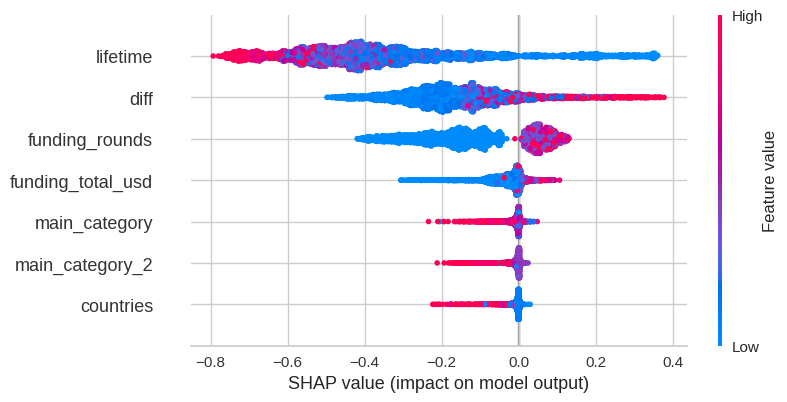

In [ ]:
shap.plots.beeswarm(shap_values[:,:,0], max_display=8)

Порядок важности функций практически такой же, как и в SelectKbest. На графиках SHAP для нашего класса 0 мы видим, что большинство признаки имеют тенденцию являет на класс 0 (отрицательные значения SHAP), наш класс меньшинства.

# Предсказание с самой лучшей моделей

In [ ]:
# Наш пердсказание
y_pred = model.predict(X_test_m)

In [ ]:
# Вероятность предсказания
y_pred_proba = model.predict_proba(X_test_m)

In [ ]:
#
y_pred_proba_one = y_pred_proba[:,1]

Площадь ROC-кривой: 0.5018677856954586
Метрика Recall на тестовой выборке: 0.8994724943481537
Метрика Precision на тестовой выборке: 0.5042244001351808


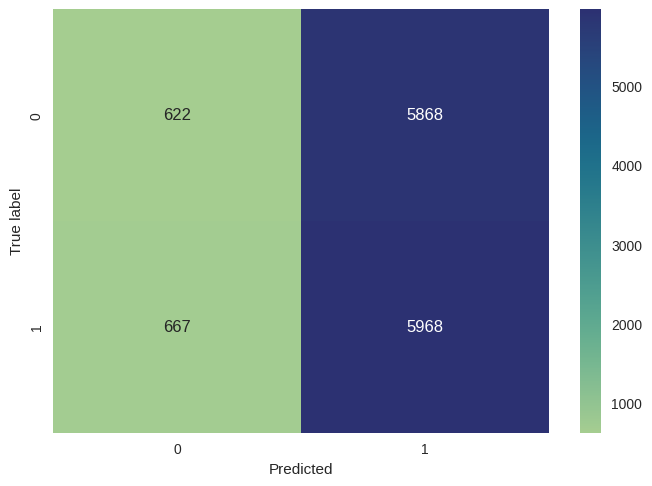

In [ ]:
print('Площадь ROC-кривой:', roc_auc_score(y_test_le, y_pred_proba_one))

print(f'Метрика Recall на тестовой выборке: {recall_score(y_test_le, y_pred)}')
print(f'Метрика Precision на тестовой выборке: {precision_score(y_test_le, y_pred)}')

cm = confusion_matrix(y_test_le, y_pred)
cm_plot = sns.heatmap(cm, annot=True, fmt='d', cmap='crest')
plt.ylabel('True label')
plt.xlabel('Predicted');

In [ ]:
# Наш метрик f1-score
f1_score(y_test_le, y_pred)

0.6462021547290348

Истинно отрицательный = 622, стартапы, которым модель предсказывала провал, но которые на самом деле потерпели неудачу.

Истинно положительный = 5968, стартапы, которые, по прогнозам модели, не потерпят неудачу, и которые ещё работает.

Ошибка первого рода = 5868, стартапы, которые, по прогнозам модели, все еще работают, но в конце концов закрылись.

Ошибка второго рода = 667, стартапы, которые модель предсказывает закрытие, но они все еще работают.

Без сюрпризов: модель хорошо предсказывает класс большинства из тренировочной набора, но не может предсказать хорощо класс меньшинства. Модел действительно отдает предпочтение классу большинства, вероятно, из-за дисбаланса в тренировочной наборе.

Результат довольно плохой, поскольку у нас много ошибок первого порядка, которы мы хотели минимизировать. Здесь, модель не смог предсказать, что 5801 стартап закроются. Здесь виновата не только модель, но и тестовый набор данных, который, похоже, не отражает реальности.

# Dummy Classifier

Нам нужно посмотреть, дала ли наша модель лучший результат, чем  dummy classifier на тестовом наборе данных.

In [ ]:
dclf = DummyClassifier(random_state = RANDOM_STATE)
dclf.fit(X_train_pipe, y_train_le)
y_pred_dummy = dclf.predict(X_test_pipe)

In [ ]:
f1_score(y_test_le, y_pred_dummy)

0.6715587044534413

Это нехорошо, dummy classifier дал лучший результат. Давайте посмотрим, что дает модулю pycaret, чтобы увидеть, как далеко мы находимся.

# Pycaret

Посмотрим, насколько мы далеки от результата pycaret.

## Настраивавание

In [ ]:
# Метод нормализации ç — z-оценка
# Метод дисбаланса ç — SMOTE
# Кодировщиком по умолчанию является target_encoder от category_encoders
# По умолчанию StratifiedKfold на 10
s1 = classification.setup(X_train_m, target=y_train_m, normalize=True, fix_imbalance=True, session_id=123)

,Description,Value
0,Session id,123
1,Target,status
2,Target type,Binary
3,Target mapping,"closed: 0, operating: 1"
4,Original data shape,"(52516, 9)"
5,Transformed data shape,"(82393, 9)"
6,Transformed train set shape,"(66638, 9)"
7,Transformed test set shape,"(15755, 9)"
8,Numeric features,4
9,Categorical features,4


## Самая лучшая модел

In [ ]:
 # Сравнение всех моделей, чтобы определить, какая из них лучше
best = classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9811,0.9912,0.9811,0.9809,0.9809,0.8867,0.8870,25.6660
xgboost,Extreme Gradient Boosting,0.9800,0.9892,0.9800,0.9797,0.9798,0.8800,0.8803,1.3160
lightgbm,Light Gradient Boosting Machine,0.9798,0.9893,0.9798,0.9795,0.9796,0.8788,0.8791,3.4870
rf,Random Forest Classifier,0.9721,0.9769,0.9721,0.9715,0.9717,0.8311,0.8316,10.7010
gbc,Gradient Boosting Classifier,0.9680,0.9781,0.9680,0.9685,0.9682,0.8141,0.8143,14.0400
et,Extra Trees Classifier,0.9680,0.9721,0.9680,0.9674,0.9676,0.8068,0.8073,5.5320
dt,Decision Tree Classifier,0.9627,0.9263,0.9627,0.9662,0.9640,0.7952,0.7980,0.8660
ada,Ada Boost Classifier,0.9307,0.9576,0.9307,0.9448,0.9356,0.6522,0.6634,3.5150
svm,SVM - Linear Kernel,0.9141,0.9630,0.9141,0.9474,0.9242,0.6229,0.6556,0.6680
knn,K Neighbors Classifier,0.9066,0.9038,0.9066,0.9298,0.9150,0.5544,0.5703,2.6570


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
# показать лучшую модель
print(best)

In [ ]:
## показать пайплайн
classification.finalize_model(best)

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['funding_total_usd',
                                             'funding_rounds', 'lifetime',
                                             'diff'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_f...
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=FixImbalancer(estimator=SMOTE(k_neighbors=5,
                                                                              n_jobs=None,
                                                                              random_state=123,
                                                                              sampling_strategy='auto')))),
                ('normalize',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=StandardScaler(copy=True,
                                                               with_mean=True,
                                                               with_std=True))),
                ('actual_estimator',
                 <catboost.core.CatBoostClassifier object at 0x7f6053791480>)],
         verbose=False)

In [ ]:
classification.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Предсказсние

In [ ]:
# Прогнозируем набор тестовых данных pycaret
classification.predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9823,0.9910,0.9823,0.9821,0.9822,0.8941,0.8942


,funding_total_usd,funding_rounds,lifetime,countries,main_category,main_category_1,main_category_2,diff,status,prediction_label,prediction_score
33019,2.425675e+05,1,916,NaN,NaN,Unknown,Unknown,509,closed,closed,1.0000
24520,5.000000e+06,1,3653,USA,Health and Wellness,Unknown,Unknown,1937,operating,operating,0.9998
10386,6.000000e+06,1,5479,ISR,Public Relations,Unknown,Unknown,1778,operating,operating,1.0000
7389,NaN,1,6940,USA,Software,Unknown,Unknown,5533,operating,operating,0.9943
46344,2.400000e+05,3,2303,BRA,Advertising,Coupons,Discounts,-155,operating,operating,0.9989
...,...,...,...,...,...,...,...,...,...,...,...
33201,3.529570e+05,1,2557,ITA,Hardware + Software,Health and Wellness,Medical,-340,operating,operating,1.0000
37570,1.719000e+06,2,4035,FRA,Hardware + Software,Unknown,Unknown,514,operating,operating,0.9997
46545,6.500000e+06,1,4748,USA,Biotechnology,Unknown,Unknown,2309,operating,operating,0.9999
45671,1.850000e+07,2,2922,IND,Curated Web,E-Commerce,Flash Sales,212,operating,operating,0.9999


In [ ]:
# Что бы предсказать от нашего тестовой датасета
py_caret_pred = classification.predict_model(best, X_test_m)

In [ ]:
py_caret_pred_le = le.transform(py_caret_pred['prediction_label'])

In [ ]:
f1_score(y_test_le, py_caret_pred_le)

0.6560101624940454

# Обшее Вывод

Одной из основных трудностей был размер набора данных: в наших тренировочных данных было более 52 000 объектов и более 13000 объектов в тестовом датасете.

Наша целевая переменная является двоичной, класс 0 был 'closed', а 'operating' — класс 1. Мы заметили некоторые пропусков среди шестами признаками: 'total_funding_usd', 'category_list', 'country_code', 'state_code', 'region' и 'city'. Последние четыре — это значения местоположеннии, которые дают нам избыточную информацию. Когда мы начали изучать дубликаты, из-за большого количества объектов нам пришлось сгруппировать те, которые реже появлялись, чтобы ограничить возможное переобучениое нашей модели.

Мы также создали две признаки: одну, которая была в данных, но отсутствовала в тренировочном данных — 'продолжительность жизни', и другую, которую я создал, чтобы принять во внимание время до первого раунда, потому что некоторые стартапы терпели неудачу, потому что они были недостаточно подготовлены. и мы могли бы подумать, что, возможно, время сыграло роль в недостаточней подготовки.

В ходе EDA мы заметили, что влияние признаков оказали незначительное на целевую переменную, в основном для тестового набора данных. «Продолжительность жизни» была наиболее влиятельной на целевую переменную в трениворочном наборе.

Согласно статистике, 70% стартапов закрываются со второго по пятый год раунда финансирования, но мы заметили, что около 53% данных составляют стартапы моложе пяти лет.

Мы также замечали дисбаланс целевой переменной в пропорции 90%–10% в наборе тренировочных данных. Это вынуждает нас использовать какой-то специальный метод, такой как SMOTETomek, или использовать атрибут class_weight нашей модели, чтобы преодолеть это. Однако во втором наборе данных оба класса были почти идеально сбалансированы. Но проблема, которую мы увидели в EDA, заключается в том, что оба класса имели почти одинаковое поведение, что больше всего повлияло на результат нашего исследования (предсказание).

Действительно, после настройки нашей пайплайны и использования её с RandomizedSearchCV с необходимыми параметрами (SimpleImputer, KNNImputer, catboost и кодировщик Leave_one_out, SMOTETomek) и тремя разными моделями машинного обучения (LGBMClassifier, BalancedRandomForest), мы обучили нашу модель и на ее основе получили нашу лучшую модель: BalancedRandomForest(). Выбор был сделан с помощью f1_score. Мы получили очень хороший результат: 98,3% заставили нас думать, что наша модель, вероятно, переобучило.

Затем мы оценили наиболее важные функции нашей модели с помощью SKbest и SHAP и попытались увидеть, какие признаки мы могли бы удалить, чтобы повысить качество нашей модели. Однако после изучения или корреляции между признаками мы имеем правильный выбор признака.

Затем мы применили модель к набору данных и получили 64,62%. Dummy Classifier дал лучший результат 67,1%, но этого и следовало ожидать, если бы оба класса вели себя одинаково. Неудивительно, что Dummy Classifier, основанный на этой основе, каждый класс ведет себя с одинаковой вероятностью.

Затем мы используем pycaret, чтобы увидеть, каков был результат и какую модель он выбрал, чтобы увидеть, может ли он дать лучший результат. Конечно, результат pycaret зависит от того как мы работали на признаки .Лучшеe модель была Catboost, она получила 65.60% еще чуть лучшее результат на f1 метрике, чем мы.

Наверно нам понадобится еще один тестовы набор данных, добавть ещё данных особенно для класс 0. Даже добавить другие признаки могут нас не спасти, потому что в тестовых наборе данных есть особый случай закрытых стартапов, текущий тестовый набор кажется не очень отражает реальность. Вероятно, можно было бы лучше работать с теми признаками, которые у нас есть, но мне не удалось найти хороших решений для улучшения качества.




